In [1]:
# Data Wrangling
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# Visualization
import matplotlib.pylab as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

# EDA
import klib

# Preprocessing & Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectPercentile

# Hyperparameter Optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Modeling
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.base import ClassifierMixin
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor


# Evaluation
from sklearn.model_selection import cross_val_score

# Utility
import os
import time
import random
import warnings; warnings.filterwarnings("ignore")
from IPython.display import Image
import pickle
from tqdm import tqdm
import platform
from itertools import combinations
from scipy.stats.mstats import gmean
from sklearn.feature_selection import RFE

import gc
import random
import re
from sklearn.metrics import *
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.decomposition import PCA # 주성분 분석

In [2]:
# 학습용과 평가용(제출용) 데이터를 읽어들인다.
train = pd.read_csv(os.path.abspath("../input")+'/X_train.csv', encoding='cp949')
test = pd.read_csv(os.path.abspath("../input")+'/X_test.csv', encoding='cp949')

# 학습용 정답 데이터를 읽는다.
y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv', encoding='cp949')

In [3]:
train.shape, test.shape, y_train.shape

((625084, 19), (414955, 19), (21587, 2))

In [4]:
train[train['pc_nm'] == '사이버쇼핑']

,custid,sales_month,sales_day,sales_dayofweek,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee
578987,27710,14,22,목,1833,본점,2300500019900,올젠,홈쇼핑,사이버쇼핑,인터넷백화점,인터넷백화점,점외,0,85000,4250,80750,3,0


In [5]:
train.head()
# 에스티로더_수입종합화장품

,custid,sales_month,sales_day,sales_dayofweek,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee
0,0,6,25,일,1212,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,90000,9000,81000,3,0
1,0,6,25,일,1242,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,39000,3900,35100,1,0
2,0,8,26,토,1810,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,175000,17500,157500,3,0
3,0,8,26,토,1830,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,잡화가용팀,수입명품,1,455000,45500,409500,3,0
4,0,9,3,일,1802,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,0,100000,10000,90000,3,0


In [6]:
train.query('inst_fee == 1')['inst_mon'].value_counts()

6     10632
5      3245
10     1639
12     1090
9       651
8       196
4       183
7       135
11       35
Name: inst_mon, dtype: int64

In [7]:
train.query('inst_fee == 0')['inst_mon'].value_counts()

1    382536
3    221798
2      2941
5         2
6         1
Name: inst_mon, dtype: int64

array([[<AxesSubplot:title={'center':'custid'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

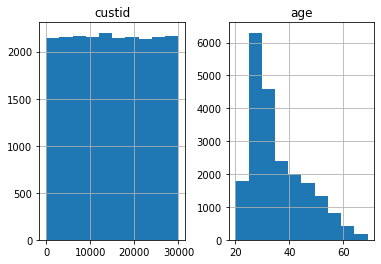

In [8]:
y_train.hist()    # target 분포 정규형에 가깝게 만들어줄 것. ex) log 변환

### EDA

In [9]:
train.head()

,custid,sales_month,sales_day,sales_dayofweek,sales_time,str_nm,goodcd,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,import_flg,tot_amt,dis_amt,net_amt,inst_mon,inst_fee
0,0,6,25,일,1212,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,90000,9000,81000,3,0
1,0,6,25,일,1242,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,1,39000,3900,35100,1,0
2,0,8,26,토,1810,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,1,175000,17500,157500,3,0
3,0,8,26,토,1830,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,잡화가용팀,수입명품,1,455000,45500,409500,3,0
4,0,9,3,일,1802,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,0,100000,10000,90000,3,0


In [12]:
train['pc_nm'].value_counts()

화장품      81373
미확인pc    39344
아동       29934
일반식품     23802
농산물      21072
         ...  
침구,수예      920
패션시즌       777
수입의류       596
용기보증         4
사이버쇼핑        1
Name: pc_nm, Length: 77, dtype: int64

### Feature Engineering

In [13]:
# 학습용과 평가용(제출용) 데이터를 읽어들인다.
train = pd.read_csv(os.path.abspath("../input")+'/X_train.csv', encoding='cp949')
test = pd.read_csv(os.path.abspath("../input")+'/X_test.csv', encoding='cp949')

# 학습용 정답 데이터를 읽는다.
y_train = pd.read_csv(os.path.abspath("../input")+'/y_train.csv', encoding='cp949')

In [14]:
test.isna().sum()

custid             0
sales_month        0
sales_day          0
sales_dayofweek    0
sales_time         0
str_nm             0
goodcd             0
brd_nm             0
corner_nm          0
pc_nm              0
part_nm            0
team_nm            0
buyer_nm           0
import_flg         0
tot_amt            0
dis_amt            0
net_amt            0
inst_mon           0
inst_fee           0
dtype: int64

In [15]:
train['sales_month_origin'] = train['sales_month']
test['sales_month_origin'] = test['sales_month']

In [16]:
train['year'] = train['sales_month_origin'].apply(lambda x: 2018 if x>12 else 2017)
test['year'] = test['sales_month_origin'].apply(lambda x: 2018 if x>12 else 2017)

In [17]:
train['sales_month'] = train['sales_month'].apply(lambda x : x-12 if x>12 else x)
test['sales_month'] = test['sales_month'].apply(lambda x : x-12 if x>12 else x)

In [18]:
train['refund_tot_amt'] = train['tot_amt'].apply(lambda x : -x if x<0 else 0)
train['refund_dis_amt'] = train['dis_amt'].apply(lambda x : -x if x<0 else 0)
train['refund_net_amt'] = train['net_amt'].apply(lambda x : -x if x<0 else 0)

test['refund_tot_amt'] = test['tot_amt'].apply(lambda x : -x if x<0 else 0)
test['refund_dis_amt'] = test['dis_amt'].apply(lambda x : -x if x<0 else 0)
test['refund_net_amt'] = test['net_amt'].apply(lambda x : -x if x<0 else 0)

In [19]:
train['refund_tot_amt_log'] = np.log1p(train['refund_tot_amt'])
train['refund_dis_amt_log'] = np.log1p(train['refund_dis_amt'])
train['refund_net_amt_log'] = np.log1p(train['refund_net_amt'])

test['refund_tot_amt_log'] = np.log1p(test['refund_tot_amt'])
test['refund_dis_amt_log'] = np.log1p(test['refund_dis_amt'])
test['refund_net_amt_log'] = np.log1p(train['refund_net_amt'])

In [20]:
train['tot_amt>=0'] = train['tot_amt'].apply(lambda x : x if x>=0 else 0)
train['dis_amt>=0'] = train['dis_amt'].apply(lambda x : x if x>=0 else 0)
train['net_amt>=0'] = train['net_amt'].apply(lambda x : x if x>=0 else 0)

test['tot_amt>=0'] = test['tot_amt'].apply(lambda x : x if x>=0 else 0)
test['dis_amt>=0'] = test['dis_amt'].apply(lambda x : x if x>=0 else 0)
test['net_amt>=0'] = test['net_amt'].apply(lambda x : x if x>=0 else 0)

In [21]:
train['tot_amt_log>=0'] = np.log1p(train['tot_amt>=0'])
train['dis_amt_log>=0'] = np.log1p(train['dis_amt>=0'])
train['net_amt_log>=0'] = np.log1p(train['net_amt>=0'])

test['tot_amt_log>=0'] = np.log1p(test['tot_amt>=0'])
test['dis_amt_log>=0'] = np.log1p(test['dis_amt>=0'])
test['net_amt_log>=0'] = np.log1p(test['net_amt>=0'])

In [22]:
train['net_amt_ratio'] = train['net_amt>=0'] / train['tot_amt>=0']
train['dis_amt_ratio'] = train['dis_amt>=0'] / train['tot_amt>=0']
train['dis_net_ratio'] = train['dis_amt>=0'] / train['net_amt>=0']

test['net_amt_ratio'] = test['net_amt>=0'] / test['tot_amt>=0']
test['dis_amt_ratio'] = test['dis_amt>=0'] / test['tot_amt>=0']
test['dis_net_ratio'] = test['dis_amt>=0'] / test['net_amt>=0']

In [23]:
# 10:30 ~ 20:00
train['sales_time_open'] = train['sales_time'].apply(lambda x : 1 if (x > 1030) and (x < 2000) else 0)
test['sales_time_open'] = test['sales_time'].apply(lambda x : 1 if (x > 1030) and (x < 2000) else 0)

In [24]:
train['sales_season'] = train['sales_month'].apply(lambda x : 'SPRING' if (x>=3) and (x<=5)
                                                  else 'SUMMER' if (x>=6) and (x<=8)
                                                  else 'FALL' if (x>=9) and (x<=11)
                                                  else 'WINTER')

test['sales_season'] = test['sales_month'].apply(lambda x : 'SPRING' if (x>=3) and (x<=5)
                                                  else 'SUMMER' if (x>=6) and (x<=8)
                                                  else 'FALL' if (x>=9) and (x<=11)
                                                  else 'WINTER')

In [25]:
train['quarter'] = pd.cut(train['sales_month'], bins = [1, 4, 7, 10, 12], 
                              right = False, labels = [1, 2, 3, 4]).astype('category')
test['quarter'] = pd.cut(test['sales_month'], bins = [1, 4, 7, 10, 12], 
                              right = False, labels = [1, 2, 3, 4]).astype('category')

In [26]:
train['month_group'] = pd.cut(train['sales_day'], bins = [1, 10, 20, 31], 
                              right = False, labels = ['Cho', 'Jung', 'Mal'])

test['month_group'] = pd.cut(test['sales_day'], bins = [1, 10, 20, 31], 
                              right = False, labels = ['Cho', 'Jung', 'Mal'])

In [27]:
train['weekend'] = train['sales_dayofweek'].apply(lambda x : 1 if (x=='토') or (x=='일') else 0)
test['weekend'] = test['sales_dayofweek'].apply(lambda x : 1 if (x=='토') or (x=='일') else 0)

In [28]:
train['inst'] = train['inst_mon'].apply(lambda x : 1 if x>1 else 0)
test['inst'] = test['inst_mon'].apply(lambda x : 1 if x>1 else 0)

In [29]:
train['year_month_day'] = train['year'].astype(str) + '_' + train['sales_month'].astype(str) + '_' + train['sales_day'].astype(str) + '_' + train['sales_time'].astype(str)
test['year_month_day'] = test['year'].astype(str) + '_' +test['sales_month'].astype(str) + '_' + test['sales_day'].astype(str) + '_' + test['sales_time'].astype(str)

train['datetime'] = pd.to_datetime(train['year_month_day'], format = '%Y_%m_%d_%H%M')
test['datetime'] = pd.to_datetime(test['year_month_day'], format = '%Y_%m_%d_%H%M')

In [30]:
# 방문주기 : 몇일 간격으로 구매가 이뤄졌는지
train['diff_time'] = train.groupby('custid')['datetime'].diff().fillna('00:00:00').astype(str)
train['diff_time'] = train['diff_time'].str.split(' days').apply(lambda x: 0 if x[0] == '00:00:00' else x[0]).astype(int)

test['diff_time'] = test.groupby('custid')['datetime'].diff().fillna('00:00:00').astype(str)
test['diff_time'] = test['diff_time'].str.split(' days').apply(lambda x: 0 if x[0] == '00:00:00' else x[0]).astype(int)

In [31]:
# 쇼핑간격 : 같은 날 몇분 간격으로 구매가 이뤄졌는지
train['day'] = train['year'].astype(str) + '_' + train['sales_month'].astype(str) + '_' + train['sales_day'].astype(str)
train['shopping_gap_open'] = train.query('sales_time_open == 1').groupby(['custid', 'day'])['datetime'].diff().dt.total_seconds().fillna(0).div(60).astype(int)
train['shopping_gap_open'] = train['shopping_gap_open'].fillna(0)

test['day'] = test['year'].astype(str) + '_' + test['sales_month'].astype(str) + '_' + test['sales_day'].astype(str)
test['shopping_gap_open'] = test.query('sales_time_open == 1').groupby(['custid', 'day'])['datetime'].diff().dt.total_seconds().fillna(0).div(60).astype(int)
test['shopping_gap_open'] = test['shopping_gap_open'].fillna(0)

In [32]:
train['shopping_gap'] = train.groupby(['custid', 'day'])['datetime'].diff().dt.total_seconds().fillna(0).div(60).astype(int)
train['shopping_gap'] = train['shopping_gap'].fillna(0)

test['shopping_gap'] = test.groupby(['custid', 'day'])['datetime'].diff().dt.total_seconds().fillna(0).div(60).astype(int)
test['shopping_gap'] = test['shopping_gap'].fillna(0)

In [33]:
# 요일명을 영어로 변경 - lgbm에서 한글 피처 명이 있으면 안됨
train['sales_dayofweek'] = train['sales_dayofweek'].apply(lambda x : 'MONDAY' if x == '월'
                                                         else 'TUESDAY' if x == '화'
                                                         else 'WEDNESDAY' if x == '수'
                                                         else 'THURSDAY' if x == '목'
                                                         else 'FRIDAY' if x == '금'
                                                         else 'SATURDAY' if x == '토'
                                                         else 'SUNDAY')

test['sales_dayofweek'] = test['sales_dayofweek'].apply(lambda x : 'MONDAY' if x == '월'
                                                         else 'TUESDAY' if x == '화'
                                                         else 'WEDNESDAY' if x == '수'
                                                         else 'THURSDAY' if x == '목'
                                                         else 'FRIDAY' if x == '금'
                                                         else 'SATURDAY' if x == '토'
                                                         else 'SUNDAY')

In [34]:
train['str_nm'] = train['str_nm'].apply(lambda x : 'MUYEOK_BRANCH' if x == '무역점'
                                                         else 'SHINCHON_BRANCH' if x == '신촌점'
                                                         else 'HEAD_OFFICE' if x == '본점'
                                                         else 'CHUNHO_BRANCH')

test['str_nm'] = test['str_nm'].apply(lambda x : 'MUYEOK_BRANCH' if x == '무역점'
                                                         else 'SHINCHON_BRANCH' if x == '신촌점'
                                                         else 'HEAD_OFFICE' if x == '본점'
                                                         else 'CHUNHO_BRANCH')

In [35]:
### 쇼핑간격, 방문주기, 누적 쇼핑간격을 이용한 범주형 변수 생성하고 피처 생성

In [36]:
train['time_split'] = train['sales_time'].apply(lambda x : 'MORNINGTIME' if (x>=700) and (x<=1130)
                                               else 'LUNCHTIME' if (x>1130) and (x<=1300)
                                               else 'AFTERNOON' if (x>1300) and (x<=1900)
                                               else 'RESTTIME')

test['time_split'] = test['sales_time'].apply(lambda x : 'MORNINGTIME' if (x>=700) and (x<=1130)
                                               else 'LUNCHTIME' if (x>1130) and (x<=1300)
                                               else 'AFTERNOON' if (x>1300) and (x<=1900)
                                               else 'RESTTIME')

In [37]:
# 무이자 혜택 카드 사용 여부 / 롯백 조건
train['card_friendly'] = train.query('net_amt >= 50000 and inst_mon > 1')['inst_fee'].apply(lambda x : 1 if x == 0 else 0)
test['card_friendly'] = test.query('net_amt >= 50000 and inst_mon > 1')['inst_fee'].apply(lambda x : 1 if x == 0 else 0)

In [38]:
train['card_friendly'] = train['card_friendly'].fillna(0)
test['card_friendly'] = test['card_friendly'].fillna(0)

In [39]:
# 환불여부
train['refund'] = train['tot_amt'].apply(lambda x: 1 if x<0 else 0)
test['refund'] = test['tot_amt'].apply(lambda x: 1 if x<0 else 0)

In [40]:
train['1shopping'] = train['shopping_gap'].apply(lambda x : 1 if x == 0 else 0)
test['1shopping'] = test['shopping_gap'].apply(lambda x : 1 if x == 0 else 0)

In [41]:
# 구매 상품별 층수(지점별로)
# 본점
# 6층 하늘정원
# 5층 식당가 / 대행사장
# 4층 남성 해외패션 / 골프
# 3층 수입부티크 / 디자이너부티크 / 캐주얼캐릭터
# 2층 수입 / 시계
# 1층 화장품 / 주얼리 / 잡화
# 지하1층 h키친 / 현대식품관 / 가전 / 가구 / 주방용품
# 지하2층 여성 컨템포러리 / 아동 / 향수 / 스포츠&잡화 / 란제리
#bon_1 = ['A.테스토니 선글라스', 'B&D 선글라스', '룩 선글라스', '룩소티카 선글라스', '린다패로우', '젠틀몬스터', '크롬하츠',
#         'JJ퀸', '갤러리 지반', '골든듀', '구찌 J&W', '디디에두보', '루첸리',
#          '미꼬주얼리', '블랑쉬클라리셰', '비체', '소노모보에', '소유', '스와로브스키', '스톤헨지',
#         '구찌', '까르띠에', '루이비통', '불가리', '샤넬', '에르메스', '크리스챤디올', '티파니', 
#         '펜디', '프라다']

## Numeric Feature

In [42]:
numeric_columns = train.dtypes[train.dtypes != 'object'].index.tolist()
train[numeric_columns].head()
#features[num_features] = features[num_features].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

,custid,sales_month,sales_day,sales_time,goodcd,import_flg,tot_amt,dis_amt,net_amt,inst_mon,...,month_group,weekend,inst,datetime,diff_time,shopping_gap_open,shopping_gap,card_friendly,refund,1shopping
0,0,6,25,1212,2116050008000,1,90000,9000,81000,3,...,Mal,1,1,2017-06-25 12:12:00,0,0.0,0,1.0,0,1
1,0,6,25,1242,4125440008000,1,39000,3900,35100,1,...,Mal,1,0,2017-06-25 12:42:00,0,30.0,30,0.0,0,0
2,0,8,26,1810,2116052008000,1,175000,17500,157500,3,...,Mal,1,1,2017-08-26 18:10:00,62,0.0,0,1.0,0,1
3,0,8,26,1830,4106430119900,1,455000,45500,409500,3,...,Mal,1,1,2017-08-26 18:30:00,0,20.0,20,1.0,0,0
4,0,9,3,1802,2139141008000,0,100000,10000,90000,3,...,Cho,1,1,2017-09-03 18:02:00,7,0.0,0,1.0,0,1


In [43]:
features = []
features_te = []

##### simple aggregation

In [ ]:
agg_dict = {
    # 기존 컬럼
    'custid':['count'],
    'sales_time':['min', 'max', 'std'],
    'goodcd':['nunique'],
    'import_flg':['mean', 'sum', 'nunique'],
    'tot_amt':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'dis_amt':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'net_amt':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'inst_mon':['min', 'max','mean', 'sum', 'std', 'skew'],
    'inst_fee':['mean', 'sum', 'nunique'],
    'sales_dayofweek':['nunique'],
    'brd_nm': [('brd_nm_nunique', lambda x: x.nunique()), 
               ('brd_nm_ratio', lambda x: x.nunique()/x.count())],
    'part_nm':[('part_nm_nunique', lambda x: x.nunique()), 
               ('part_nm_ratio', lambda x: x.nunique()/x.count())],
    'buyer_nm':[('buyer_nm_nunique', lambda x: x.nunique()), 
               ('buyer_nm_ratio', lambda x: x.nunique()/x.count())],
    'sales_dayofweek':[('sales_dayofweek_nunique', lambda x: x.nunique()), 
               ('sales_dayofweek_ratio', lambda x: x.nunique()/x.count())],
   
    # 추가 가공 컬럼
    'tot_amt>=0':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'dis_amt>=0':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'net_amt>=0':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'refund_tot_amt':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'refund_dis_amt':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'refund_net_amt':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'refund_tot_amt_log':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'refund_dis_amt_log':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'refund_net_amt_log':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'tot_amt_log>=0':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'dis_amt_log>=0':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'net_amt_log>=0':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'net_amt_ratio':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'dis_amt_ratio':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'dis_net_ratio':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'sales_time_open':['mean', 'sum'],
    'weekend':['mean', 'sum'],
    'inst':['mean', 'sum'],
    'diff_time':['min', 'max', 'mean', 'sum', 'std', 'skew'],
    'shopping_gap_open':['min', 'max','mean', 'sum', 'std', 'skew'],
    'card_friendly':['mean', 'sum'],
    'shopping_gap':['min', 'max', 'mean', 'sum', 'std', 'skew'],
}

In [ ]:
f = train.groupby('custid').agg(agg_dict)
f = f.fillna(0)
f.columns = [('_').join(column).upper() for column in f.columns.ravel()]

f['cf_cc_ratio'] = (f['CARD_FRIENDLY_SUM'] / f['CUSTID_COUNT']).fillna(0)
f['tot_dis_ratio'] = (f['DIS_AMT_LOG>=0_SUM'] / f['TOT_AMT_LOG>=0_SUM']).fillna(0)
f['tot_net_ratio'] = (f['NET_AMT_LOG>=0_SUM'] / f['TOT_AMT_LOG>=0_SUM']).fillna(0)
f['dis_net_ratio'] = (f['DIS_AMT_LOG>=0_SUM'] / f['NET_AMT_LOG>=0_SUM']).fillna(0)
f['open_gap_sum_ratio'] = (f['SHOPPING_GAP_OPEN_SUM'] / f['SHOPPING_GAP_SUM']).fillna(0)

f['customer_grade'] = f['NET_AMT_SUM'].apply(lambda x: 7 if x < 4000000
                                     else 6 if x < 8000000
                                     else 5 if x < 20000000
                                     else 4 if x < 40000000
                                     else 3 if x < 60000000
                                     else 2 if x < 100000000
                                     else 1)

f = f.reset_index()
features.append(f); display(f)

In [ ]:
f_te = test.groupby('custid').agg(agg_dict)
f_te = f_te.fillna(0)
f_te.columns = [('_').join(column).upper() for column in f_te.columns.ravel()]

f_te['cf_cc_ratio'] = (f_te['CARD_FRIENDLY_SUM'] / f_te['CUSTID_COUNT']).fillna(0)
f_te['tot_dis_ratio'] = (f_te['DIS_AMT_LOG>=0_SUM'] / f_te['TOT_AMT_LOG>=0_SUM']).fillna(0)
f_te['tot_net_ratio'] = (f_te['NET_AMT_LOG>=0_SUM'] / f_te['TOT_AMT_LOG>=0_SUM']).fillna(0)
f_te['dis_net_ratio'] = (f_te['DIS_AMT_LOG>=0_SUM'] / f_te['NET_AMT_LOG>=0_SUM']).fillna(0)
f_te['open_gap_sum_ratio'] = (f_te['SHOPPING_GAP_OPEN_SUM'] / f_te['SHOPPING_GAP_SUM']).fillna(0)

f_te['customer_grade'] = f_te['NET_AMT_SUM'].apply(lambda x: 7 if x < 4000000
                                     else 6 if x < 8000000
                                     else 5 if x < 20000000
                                     else 4 if x < 40000000
                                     else 3 if x < 60000000
                                     else 2 if x < 100000000
                                     else 1)

f_te = f_te.reset_index()
features_te.append(f_te); display(f_te)

##### 계절별 피처 생성

In [ ]:
f = train.groupby(['custid', 'sales_season']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Season_'+ str(column) for column in f.columns]

f['cf_cc_ratio_spring'] = (f["Season_('card_friendly', 'sum', 'SPRING')"] / f["Season_('custid', 'count', 'SPRING')"]).fillna(0)
f['tot_dis_ratio_spring'] = (f["Season_('dis_amt_log>=0', 'sum', 'SPRING')"] / f["Season_('tot_amt_log>=0', 'sum', 'SPRING')"]).fillna(0)
f['tot_net_ratio_spring'] = (f["Season_('net_amt_log>=0', 'sum', 'SPRING')"] / f["Season_('tot_amt_log>=0', 'sum', 'SPRING')"]).fillna(0)
f['dis_net_ratio_spring'] = (f["Season_('dis_amt_log>=0', 'sum', 'SPRING')"] / f["Season_('net_amt_log>=0', 'sum', 'SPRING')"]).fillna(0)
f['open_gap_sum_ratio_spring'] = (f["Season_('shopping_gap_open', 'sum', 'SPRING')"] / f["Season_('shopping_gap', 'sum', 'SPRING')"]).fillna(0)

f['cf_cc_ratio_summer'] = (f["Season_('card_friendly', 'sum', 'SUMMER')"] / f["Season_('custid', 'count', 'SUMMER')"]).fillna(0)
f['tot_dis_ratio_summer'] = (f["Season_('dis_amt_log>=0', 'sum', 'SUMMER')"] / f["Season_('tot_amt_log>=0', 'sum', 'SUMMER')"]).fillna(0)
f['tot_net_ratio_summer'] = (f["Season_('net_amt_log>=0', 'sum', 'SUMMER')"] / f["Season_('tot_amt_log>=0', 'sum', 'SUMMER')"]).fillna(0)
f['dis_net_ratio_summer'] = (f["Season_('dis_amt_log>=0', 'sum', 'SUMMER')"] / f["Season_('net_amt_log>=0', 'sum', 'SUMMER')"]).fillna(0)
f['open_gap_sum_ratio_summer'] = (f["Season_('shopping_gap_open', 'sum', 'SUMMER')"] / f["Season_('shopping_gap', 'sum', 'SUMMER')"]).fillna(0)

f['cf_cc_ratio_fall'] = (f["Season_('card_friendly', 'sum', 'FALL')"] / f["Season_('custid', 'count', 'FALL')"]).fillna(0)
f['tot_dis_ratio_fall'] = (f["Season_('dis_amt_log>=0', 'sum', 'FALL')"] / f["Season_('tot_amt_log>=0', 'sum', 'FALL')"]).fillna(0)
f['tot_net_ratio_fall'] = (f["Season_('net_amt_log>=0', 'sum', 'FALL')"] / f["Season_('tot_amt_log>=0', 'sum', 'FALL')"]).fillna(0)
f['dis_net_ratio_fall'] = (f["Season_('dis_amt_log>=0', 'sum', 'FALL')"] / f["Season_('net_amt_log>=0', 'sum', 'FALL')"]).fillna(0)
f['open_gap_sum_ratio_fall'] = (f["Season_('shopping_gap_open', 'sum', 'FALL')"] / f["Season_('shopping_gap', 'sum', 'FALL')"]).fillna(0)

f['cf_cc_ratio_winter'] = (f["Season_('card_friendly', 'sum', 'WINTER')"] / f["Season_('custid', 'count', 'WINTER')"]).fillna(0)
f['tot_dis_ratio_winter'] = (f["Season_('dis_amt_log>=0', 'sum', 'WINTER')"] / f["Season_('tot_amt_log>=0', 'sum', 'WINTER')"]).fillna(0)
f['tot_net_ratio_winter'] = (f["Season_('net_amt_log>=0', 'sum', 'WINTER')"] / f["Season_('tot_amt_log>=0', 'sum', 'WINTER')"]).fillna(0)
f['dis_net_ratio_winter'] = (f["Season_('dis_amt_log>=0', 'sum', 'WINTER')"] / f["Season_('net_amt_log>=0', 'sum', 'WINTER')"]).fillna(0)
f['open_gap_sum_ratio_winter'] = (f["Season_('shopping_gap_open', 'sum', 'WINTER')"] / f["Season_('shopping_gap', 'sum', 'WINTER')"]).fillna(0)

f = f.reset_index()
features.append(f);f

In [ ]:
f_te = test.groupby(['custid', 'sales_season']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Season_'+ str(column) for column in f_te.columns]

f_te['cf_cc_ratio_spring'] = (f_te["Season_('card_friendly', 'sum', 'SPRING')"] / f_te["Season_('custid', 'count', 'SPRING')"]).fillna(0)
f_te['tot_dis_ratio_spring'] = (f_te["Season_('dis_amt_log>=0', 'sum', 'SPRING')"] / f_te["Season_('tot_amt_log>=0', 'sum', 'SPRING')"]).fillna(0)
f_te['tot_net_ratio_spring'] = (f_te["Season_('net_amt_log>=0', 'sum', 'SPRING')"] / f_te["Season_('tot_amt_log>=0', 'sum', 'SPRING')"]).fillna(0)
f_te['dis_net_ratio_spring'] = (f_te["Season_('dis_amt_log>=0', 'sum', 'SPRING')"] / f_te["Season_('net_amt_log>=0', 'sum', 'SPRING')"]).fillna(0)
f_te['open_gap_sum_ratio_spring'] = (f_te["Season_('shopping_gap_open', 'sum', 'SPRING')"] / f_te["Season_('shopping_gap', 'sum', 'SPRING')"]).fillna(0)

f_te['cf_cc_ratio_summer'] = (f_te["Season_('card_friendly', 'sum', 'SUMMER')"] / f_te["Season_('custid', 'count', 'SUMMER')"]).fillna(0)
f_te['tot_dis_ratio_summer'] = (f_te["Season_('dis_amt_log>=0', 'sum', 'SUMMER')"] / f_te["Season_('tot_amt_log>=0', 'sum', 'SUMMER')"]).fillna(0)
f_te['tot_net_ratio_summer'] = (f_te["Season_('net_amt_log>=0', 'sum', 'SUMMER')"] / f_te["Season_('tot_amt_log>=0', 'sum', 'SUMMER')"]).fillna(0)
f_te['dis_net_ratio_summer'] = (f_te["Season_('dis_amt_log>=0', 'sum', 'SUMMER')"] / f_te["Season_('net_amt_log>=0', 'sum', 'SUMMER')"]).fillna(0)
f_te['open_gap_sum_ratio_summer'] = (f_te["Season_('shopping_gap_open', 'sum', 'SUMMER')"] / f_te["Season_('shopping_gap', 'sum', 'SUMMER')"]).fillna(0)

f_te['cf_cc_ratio_fall'] = (f_te["Season_('card_friendly', 'sum', 'FALL')"] / f_te["Season_('custid', 'count', 'FALL')"]).fillna(0)
f_te['tot_dis_ratio_fall'] = (f_te["Season_('dis_amt_log>=0', 'sum', 'FALL')"] / f_te["Season_('tot_amt_log>=0', 'sum', 'FALL')"]).fillna(0)
f_te['tot_net_ratio_fall'] = (f_te["Season_('net_amt_log>=0', 'sum', 'FALL')"] / f_te["Season_('tot_amt_log>=0', 'sum', 'FALL')"]).fillna(0)
f_te['dis_net_ratio_fall'] = (f_te["Season_('dis_amt_log>=0', 'sum', 'FALL')"] / f_te["Season_('net_amt_log>=0', 'sum', 'FALL')"]).fillna(0)
f_te['open_gap_sum_ratio_fall'] = (f_te["Season_('shopping_gap_open', 'sum', 'FALL')"] / f_te["Season_('shopping_gap', 'sum', 'FALL')"]).fillna(0)

f_te['cf_cc_ratio_winter'] = (f_te["Season_('card_friendly', 'sum', 'WINTER')"] / f_te["Season_('custid', 'count', 'WINTER')"]).fillna(0)
f_te['tot_dis_ratio_winter'] = (f_te["Season_('dis_amt_log>=0', 'sum', 'WINTER')"] / f_te["Season_('tot_amt_log>=0', 'sum', 'WINTER')"]).fillna(0)
f_te['tot_net_ratio_winter'] = (f_te["Season_('net_amt_log>=0', 'sum', 'WINTER')"] / f_te["Season_('tot_amt_log>=0', 'sum', 'WINTER')"]).fillna(0)
f_te['dis_net_ratio_winter'] = (f_te["Season_('dis_amt_log>=0', 'sum', 'WINTER')"] / f_te["Season_('net_amt_log>=0', 'sum', 'WINTER')"]).fillna(0)
f_te['open_gap_sum_ratio_winter'] = (f_te["Season_('shopping_gap_open', 'sum', 'WINTER')"] / f_te["Season_('shopping_gap', 'sum', 'WINTER')"]).fillna(0)

f_te = f_te.reset_index()
features_te.append(f_te);f_te

##### 분기별 피처 생성

In [ ]:
f = train.groupby(['custid', 'quarter']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Quarter_'+ str(column) for column in f.columns]

f['cf_cc_ratio_quarter1'] = (f["Quarter_('card_friendly', 'sum', 1)"] / f["Quarter_('custid', 'count', 1)"]).fillna(0)
f['tot_dis_ratio_quarter1'] = (f["Quarter_('dis_amt_log>=0', 'sum', 1)"] / f["Quarter_('tot_amt_log>=0', 'sum', 1)"]).fillna(0)
f['tot_net_ratio_quarter1'] = (f["Quarter_('net_amt_log>=0', 'sum', 1)"] / f["Quarter_('tot_amt_log>=0', 'sum', 1)"]).fillna(0)
f['dis_net_ratio_quarter1'] = (f["Quarter_('dis_amt_log>=0', 'sum', 1)"] / f["Quarter_('net_amt_log>=0', 'sum', 1)"]).fillna(0)
f['open_gap_sum_ratio_quarter1'] = (f["Quarter_('shopping_gap_open', 'sum', 1)"] / f["Quarter_('shopping_gap', 'sum', 1)"]).fillna(0)

f['cf_cc_ratio_quarter2'] = (f["Quarter_('card_friendly', 'sum', 2)"] / f["Quarter_('custid', 'count', 2)"]).fillna(0)
f['tot_dis_ratio_quarter2'] = (f["Quarter_('dis_amt_log>=0', 'sum', 2)"] / f["Quarter_('tot_amt_log>=0', 'sum', 2)"]).fillna(0)
f['tot_net_ratio_quarter2'] = (f["Quarter_('net_amt_log>=0', 'sum', 2)"] / f["Quarter_('tot_amt_log>=0', 'sum', 2)"]).fillna(0)
f['dis_net_ratio_quarter2'] = (f["Quarter_('dis_amt_log>=0', 'sum', 2)"] / f["Quarter_('net_amt_log>=0', 'sum', 2)"]).fillna(0)
f['open_gap_sum_ratio_quarter2'] = (f["Quarter_('shopping_gap_open', 'sum', 2)"] / f["Quarter_('shopping_gap', 'sum', 2)"]).fillna(0)

f['cf_cc_ratio_quarter3'] = (f["Quarter_('card_friendly', 'sum', 3)"] / f["Quarter_('custid', 'count', 3)"]).fillna(0)
f['tot_dis_ratio_quarter3'] = (f["Quarter_('dis_amt_log>=0', 'sum', 3)"] / f["Quarter_('tot_amt_log>=0', 'sum', 3)"]).fillna(0)
f['tot_net_ratio_quarter3'] = (f["Quarter_('net_amt_log>=0', 'sum', 3)"] / f["Quarter_('tot_amt_log>=0', 'sum', 3)"]).fillna(0)
f['dis_net_ratio_quarter3'] = (f["Quarter_('dis_amt_log>=0', 'sum', 3)"] / f["Quarter_('net_amt_log>=0', 'sum', 3)"]).fillna(0)
f['open_gap_sum_ratio_quarter3'] = (f["Quarter_('shopping_gap_open', 'sum', 3)"] / f["Quarter_('shopping_gap', 'sum', 3)"]).fillna(0)

f['cf_cc_ratio_quarter4'] = (f["Quarter_('card_friendly', 'sum', 4)"] / f["Quarter_('custid', 'count', 4)"]).fillna(0)
f['tot_dis_ratio_quarter4'] = (f["Quarter_('dis_amt_log>=0', 'sum', 4)"] / f["Quarter_('tot_amt_log>=0', 'sum', 4)"]).fillna(0)
f['tot_net_ratio_quarter4'] = (f["Quarter_('net_amt_log>=0', 'sum', 4)"] / f["Quarter_('tot_amt_log>=0', 'sum', 4)"]).fillna(0)
f['dis_net_ratio_quarter4'] = (f["Quarter_('dis_amt_log>=0', 'sum', 4)"] / f["Quarter_('net_amt_log>=0', 'sum', 4)"]).fillna(0)
f['open_gap_sum_ratio_quarter4'] = (f["Quarter_('shopping_gap_open', 'sum', 4)"] / f["Quarter_('shopping_gap', 'sum', 4)"]).fillna(0)

f = f.reset_index()
features.append(f);f

In [ ]:
f_te = test.groupby(['custid', 'quarter']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Quarter_'+ str(column) for column in f_te.columns]

f_te['cf_cc_ratio_quarter1'] = (f_te["Quarter_('card_friendly', 'sum', 1)"] / f_te["Quarter_('custid', 'count', 1)"]).fillna(0)
f_te['tot_dis_ratio_quarter1'] = (f_te["Quarter_('dis_amt_log>=0', 'sum', 1)"] / f_te["Quarter_('tot_amt_log>=0', 'sum', 1)"]).fillna(0)
f_te['tot_net_ratio_quarter1'] = (f_te["Quarter_('net_amt_log>=0', 'sum', 1)"] / f_te["Quarter_('tot_amt_log>=0', 'sum', 1)"]).fillna(0)
f_te['dis_net_ratio_quarter1'] = (f_te["Quarter_('dis_amt_log>=0', 'sum', 1)"] / f_te["Quarter_('net_amt_log>=0', 'sum', 1)"]).fillna(0)
f_te['open_gap_sum_ratio_quarter1'] = (f_te["Quarter_('shopping_gap_open', 'sum', 1)"] / f_te["Quarter_('shopping_gap', 'sum', 1)"]).fillna(0)

f_te['cf_cc_ratio_quarter2'] = (f_te["Quarter_('card_friendly', 'sum', 2)"] / f_te["Quarter_('custid', 'count', 2)"]).fillna(0)
f_te['tot_dis_ratio_quarter2'] = (f_te["Quarter_('dis_amt_log>=0', 'sum', 2)"] / f_te["Quarter_('tot_amt_log>=0', 'sum', 2)"]).fillna(0)
f_te['tot_net_ratio_quarter2'] = (f_te["Quarter_('net_amt_log>=0', 'sum', 2)"] / f_te["Quarter_('tot_amt_log>=0', 'sum', 2)"]).fillna(0)
f_te['dis_net_ratio_quarter2'] = (f_te["Quarter_('dis_amt_log>=0', 'sum', 2)"] / f_te["Quarter_('net_amt_log>=0', 'sum', 2)"]).fillna(0)
f_te['open_gap_sum_ratio_quarter2'] = (f_te["Quarter_('shopping_gap_open', 'sum', 2)"] / f_te["Quarter_('shopping_gap', 'sum', 2)"]).fillna(0)

f_te['cf_cc_ratio_quarter3'] = (f_te["Quarter_('card_friendly', 'sum', 3)"] / f_te["Quarter_('custid', 'count', 3)"]).fillna(0)
f_te['tot_dis_ratio_quarter3'] = (f_te["Quarter_('dis_amt_log>=0', 'sum', 3)"] / f_te["Quarter_('tot_amt_log>=0', 'sum', 3)"]).fillna(0)
f_te['tot_net_ratio_quarter3'] = (f_te["Quarter_('net_amt_log>=0', 'sum', 3)"] / f_te["Quarter_('tot_amt_log>=0', 'sum', 3)"]).fillna(0)
f_te['dis_net_ratio_quarter3'] = (f_te["Quarter_('dis_amt_log>=0', 'sum', 3)"] / f_te["Quarter_('net_amt_log>=0', 'sum', 3)"]).fillna(0)
f_te['open_gap_sum_ratio_quarter3'] = (f_te["Quarter_('shopping_gap_open', 'sum', 3)"] / f_te["Quarter_('shopping_gap', 'sum', 3)"]).fillna(0)

f_te['cf_cc_ratio_quarter4'] = (f_te["Quarter_('card_friendly', 'sum', 4)"] / f_te["Quarter_('custid', 'count', 4)"]).fillna(0)
f_te['tot_dis_ratio_quarter4'] = (f_te["Quarter_('dis_amt_log>=0', 'sum', 4)"] / f_te["Quarter_('tot_amt_log>=0', 'sum', 4)"]).fillna(0)
f_te['tot_net_ratio_quarter4'] = (f_te["Quarter_('net_amt_log>=0', 'sum', 4)"] / f_te["Quarter_('tot_amt_log>=0', 'sum', 4)"]).fillna(0)
f_te['dis_net_ratio_quarter4'] = (f_te["Quarter_('dis_amt_log>=0', 'sum', 4)"] / f_te["Quarter_('net_amt_log>=0', 'sum', 4)"]).fillna(0)
f_te['open_gap_sum_ratio_quarter4'] = (f_te["Quarter_('shopping_gap_open', 'sum', 4)"] / f_te["Quarter_('shopping_gap', 'sum', 4)"]).fillna(0)

f_te = f_te.reset_index()
features_te.append(f_te);f_te

##### month_group별 피처 생성

In [49]:
f = train.groupby(['custid', 'month_group']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Month_group_'+ str(column) for column in f.columns]

f['cf_cc_ratio_month_group_Cho'] = (f["Month_group_('card_friendly', 'sum', 'Cho')"] / f["Month_group_('custid', 'count', 'Cho')"]).fillna(0)
f['tot_dis_ratio_month_group_Cho'] = (f["Month_group_('dis_amt_log>=0', 'sum', 'Cho')"] / f["Month_group_('tot_amt_log>=0', 'sum', 'Cho')"]).fillna(0)
f['tot_net_ratio_month_group_Cho'] = (f["Month_group_('net_amt_log>=0', 'sum', 'Cho')"] / f["Month_group_('tot_amt_log>=0', 'sum', 'Cho')"]).fillna(0)
f['dis_net_ratio_month_group_Cho'] = (f["Month_group_('dis_amt_log>=0', 'sum', 'Cho')"] / f["Month_group_('net_amt_log>=0', 'sum', 'Cho')"]).fillna(0)
f['open_gap_sum_ratio_month_group_Cho'] = (f["Month_group_('shopping_gap_open', 'sum', 'Cho')"] / f["Month_group_('shopping_gap', 'sum', 'Cho')"]).fillna(0)

f['cf_cc_ratio_month_group_Jung'] = (f["Month_group_('card_friendly', 'sum', 'Jung')"] / f["Month_group_('custid', 'count', 'Jung')"]).fillna(0)
f['tot_dis_ratio_month_group_Jung'] = (f["Month_group_('dis_amt_log>=0', 'sum', 'Jung')"] / f["Month_group_('tot_amt_log>=0', 'sum', 'Jung')"]).fillna(0)
f['tot_net_ratio_month_group_Jung'] = (f["Month_group_('net_amt_log>=0', 'sum', 'Jung')"] / f["Month_group_('tot_amt_log>=0', 'sum', 'Jung')"]).fillna(0)
f['dis_net_ratio_month_group_Jung'] = (f["Month_group_('dis_amt_log>=0', 'sum', 'Jung')"] / f["Month_group_('net_amt_log>=0', 'sum', 'Jung')"]).fillna(0)
f['open_gap_sum_ratio_month_group_Jung'] = (f["Month_group_('shopping_gap_open', 'sum', 'Jung')"] / f["Month_group_('shopping_gap', 'sum', 'Jung')"]).fillna(0)

f['cf_cc_ratio_month_group_Mal'] = (f["Month_group_('card_friendly', 'sum', 'Mal')"] / f["Month_group_('custid', 'count', 'Mal')"]).fillna(0)
f['tot_dis_ratio_month_group_Mal'] = (f["Month_group_('dis_amt_log>=0', 'sum', 'Mal')"] / f["Month_group_('tot_amt_log>=0', 'sum', 'Mal')"]).fillna(0)
f['tot_net_ratio_month_group_Mal'] = (f["Month_group_('net_amt_log>=0', 'sum', 'Mal')"] / f["Month_group_('tot_amt_log>=0', 'sum', 'Mal')"]).fillna(0)
f['dis_net_ratio_month_group_Mal'] = (f["Month_group_('dis_amt_log>=0', 'sum', 'Mal')"] / f["Month_group_('net_amt_log>=0', 'sum', 'Mal')"]).fillna(0)
f['open_gap_sum_ratio_month_group_Mal'] = (f["Month_group_('shopping_gap_open', 'sum', 'Mal')"] / f["Month_group_('shopping_gap', 'sum', 'Mal')"]).fillna(0)

f = f.reset_index()
features.append(f);f

,custid,"Month_group_('custid', 'count', 'Cho')","Month_group_('custid', 'count', 'Jung')","Month_group_('custid', 'count', 'Mal')","Month_group_('sales_time', 'min', 'Cho')","Month_group_('sales_time', 'min', 'Jung')","Month_group_('sales_time', 'min', 'Mal')","Month_group_('sales_time', 'max', 'Cho')","Month_group_('sales_time', 'max', 'Jung')","Month_group_('sales_time', 'max', 'Mal')",...,cf_cc_ratio_month_group_Jung,tot_dis_ratio_month_group_Jung,tot_net_ratio_month_group_Jung,dis_net_ratio_month_group_Jung,open_gap_sum_ratio_month_group_Jung,cf_cc_ratio_month_group_Mal,tot_dis_ratio_month_group_Mal,tot_net_ratio_month_group_Mal,dis_net_ratio_month_group_Mal,open_gap_sum_ratio_month_group_Mal
0,0,4,1,6,1802.0,1920.0,1212.0,1930.0,1920.0,1910.0,...,1.000000,0.799297,0.990816,0.806705,0.0,0.833333,0.804241,0.991042,0.811511,1.000000
1,2,5,2,4,1050.0,1651.0,1401.0,1920.0,1721.0,1901.0,...,0.500000,0.809345,0.991274,0.816469,1.0,0.000000,0.826501,0.992061,0.833115,1.000000
2,3,8,5,17,1653.0,1203.0,1113.0,1850.0,1810.0,1943.0,...,0.800000,0.156090,0.999047,0.156239,1.0,0.529412,0.613124,0.996222,0.615449,1.000000
3,4,0,0,4,0.0,0.0,1403.0,0.0,0.0,1450.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.250000,0.372814,0.997857,0.373614,1.000000
4,5,8,9,13,1102.0,1110.0,1130.0,1910.0,1812.0,1912.0,...,0.444444,0.636684,0.993545,0.640821,1.0,0.538462,0.683368,0.992352,0.688635,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,19,11,41,1023.0,1210.0,1030.0,1820.0,1740.0,1913.0,...,0.454545,0.612634,0.996616,0.614714,0.0,0.463415,0.617085,0.996481,0.619264,0.950226
21583,29996,2,8,9,1622.0,1240.0,1252.0,1632.0,1912.0,1842.0,...,0.125000,0.468937,0.994653,0.471458,1.0,0.111111,0.679350,0.992135,0.684735,1.000000
21584,29997,4,10,6,1520.0,1250.0,1442.0,1730.0,1730.0,1640.0,...,0.300000,0.160536,0.998118,0.160838,1.0,0.000000,0.367329,0.994862,0.369226,1.000000
21585,29998,6,0,7,1313.0,0.0,1303.0,1903.0,0.0,1520.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.571429,0.411729,0.997331,0.412831,1.000000


In [50]:
f_te = test.groupby(['custid', 'month_group']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Month_group_'+ str(column) for column in f_te.columns]

f_te['cf_cc_ratio_month_group_Cho'] = (f_te["Month_group_('card_friendly', 'sum', 'Cho')"] / f_te["Month_group_('custid', 'count', 'Cho')"]).fillna(0)
f_te['tot_dis_ratio_month_group_Cho'] = (f_te["Month_group_('dis_amt_log>=0', 'sum', 'Cho')"] / f_te["Month_group_('tot_amt_log>=0', 'sum', 'Cho')"]).fillna(0)
f_te['tot_net_ratio_month_group_Cho'] = (f_te["Month_group_('net_amt_log>=0', 'sum', 'Cho')"] / f_te["Month_group_('tot_amt_log>=0', 'sum', 'Cho')"]).fillna(0)
f_te['dis_net_ratio_month_group_Cho'] = (f_te["Month_group_('dis_amt_log>=0', 'sum', 'Cho')"] / f_te["Month_group_('net_amt_log>=0', 'sum', 'Cho')"]).fillna(0)
f_te['open_gap_sum_ratio_month_group_Cho'] = (f_te["Month_group_('shopping_gap_open', 'sum', 'Cho')"] / f_te["Month_group_('shopping_gap', 'sum', 'Cho')"]).fillna(0)

f_te['cf_cc_ratio_month_group_Jung'] = (f_te["Month_group_('card_friendly', 'sum', 'Jung')"] / f_te["Month_group_('custid', 'count', 'Jung')"]).fillna(0)
f_te['tot_dis_ratio_month_group_Jung'] = (f_te["Month_group_('dis_amt_log>=0', 'sum', 'Jung')"] / f_te["Month_group_('tot_amt_log>=0', 'sum', 'Jung')"]).fillna(0)
f_te['tot_net_ratio_month_group_Jung'] = (f_te["Month_group_('net_amt_log>=0', 'sum', 'Jung')"] / f_te["Month_group_('tot_amt_log>=0', 'sum', 'Jung')"]).fillna(0)
f_te['dis_net_ratio_month_group_Jung'] = (f_te["Month_group_('dis_amt_log>=0', 'sum', 'Jung')"] / f_te["Month_group_('net_amt_log>=0', 'sum', 'Jung')"]).fillna(0)
f_te['open_gap_sum_ratio_month_group_Jung'] = (f_te["Month_group_('shopping_gap_open', 'sum', 'Jung')"] / f_te["Month_group_('shopping_gap', 'sum', 'Jung')"]).fillna(0)

f_te['cf_cc_ratio_month_group_Mal'] = (f_te["Month_group_('card_friendly', 'sum', 'Mal')"] / f_te["Month_group_('custid', 'count', 'Mal')"]).fillna(0)
f_te['tot_dis_ratio_month_group_Mal'] = (f_te["Month_group_('dis_amt_log>=0', 'sum', 'Mal')"] / f_te["Month_group_('tot_amt_log>=0', 'sum', 'Mal')"]).fillna(0)
f_te['tot_net_ratio_month_group_Mal'] = (f_te["Month_group_('net_amt_log>=0', 'sum', 'Mal')"] / f_te["Month_group_('tot_amt_log>=0', 'sum', 'Mal')"]).fillna(0)
f_te['dis_net_ratio_month_group_Mal'] = (f_te["Month_group_('dis_amt_log>=0', 'sum', 'Mal')"] / f_te["Month_group_('net_amt_log>=0', 'sum', 'Mal')"]).fillna(0)
f_te['open_gap_sum_ratio_month_group_Mal'] = (f_te["Month_group_('shopping_gap_open', 'sum', 'Mal')"] / f_te["Month_group_('shopping_gap', 'sum', 'Mal')"]).fillna(0)

f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Month_group_('custid', 'count', 'Cho')","Month_group_('custid', 'count', 'Jung')","Month_group_('custid', 'count', 'Mal')","Month_group_('sales_time', 'min', 'Cho')","Month_group_('sales_time', 'min', 'Jung')","Month_group_('sales_time', 'min', 'Mal')","Month_group_('sales_time', 'max', 'Cho')","Month_group_('sales_time', 'max', 'Jung')","Month_group_('sales_time', 'max', 'Mal')",...,cf_cc_ratio_month_group_Jung,tot_dis_ratio_month_group_Jung,tot_net_ratio_month_group_Jung,dis_net_ratio_month_group_Jung,open_gap_sum_ratio_month_group_Jung,cf_cc_ratio_month_group_Mal,tot_dis_ratio_month_group_Mal,tot_net_ratio_month_group_Mal,dis_net_ratio_month_group_Mal,open_gap_sum_ratio_month_group_Mal
0,30001,5,10,11,1703.0,1700.0,1643.0,1910.0,1843.0,1740.0,...,0.300000,0.226558,0.998657,0.226863,1.0,0.454545,0.543393,0.996845,0.545113,1.0
1,30002,24,58,20,1150.0,1050.0,1223.0,1903.0,1930.0,1903.0,...,0.517241,0.510278,0.996916,0.511857,1.0,0.500000,0.615869,0.996373,0.618111,1.0
2,30003,29,8,10,1243.0,1403.0,1250.0,1910.0,1923.0,1930.0,...,0.125000,0.431035,0.996929,0.432363,1.0,0.300000,0.084071,0.999512,0.084112,1.0
3,30005,1,0,0,1903.0,0.0,0.0,1903.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,30007,0,3,3,0.0,1643.0,1540.0,0.0,1933.0,1843.0,...,0.000000,0.722308,0.995245,0.725759,1.0,0.333333,0.242752,0.998405,0.243140,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,4,0,0,1220.0,0.0,0.0,1800.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
14376,49990,0,0,1,0.0,0.0,1503.0,0.0,0.0,1503.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.755837,0.995819,0.759011,0.0
14377,49992,1,1,0,1740.0,1853.0,0.0,1740.0,1853.0,0.0,...,0.000000,0.751023,0.995737,0.754239,0.0,0.000000,0.000000,0.000000,0.000000,0.0
14378,49993,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


##### 주말여부별 피처 생성

In [51]:
f = train.groupby(['custid', 'weekend']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Weekend_'+ str(column) for column in f.columns]

f['cf_cc_ratio_weekend1'] = (f["Weekend_('card_friendly', 'sum', 1)"] / f["Weekend_('custid', 'count', 1)"]).fillna(0)
f['tot_dis_ratio_weekend1'] = (f["Weekend_('dis_amt_log>=0', 'sum', 1)"] / f["Weekend_('tot_amt_log>=0', 'sum', 1)"]).fillna(0)
f['tot_net_ratio_weekend1'] = (f["Weekend_('net_amt_log>=0', 'sum', 1)"] / f["Weekend_('tot_amt_log>=0', 'sum', 1)"]).fillna(0)
f['dis_net_ratio_weekend1'] = (f["Weekend_('dis_amt_log>=0', 'sum', 1)"] / f["Weekend_('net_amt_log>=0', 'sum', 1)"]).fillna(0)
f['open_gap_sum_ratio_weekend1'] = (f["Weekend_('shopping_gap_open', 'sum', 1)"] / f["Weekend_('shopping_gap', 'sum', 1)"]).fillna(0)

f['cf_cc_ratio_weekend2'] = (f["Weekend_('card_friendly', 'sum', 0)"] / f["Weekend_('custid', 'count', 0)"]).fillna(0)
f['tot_dis_ratio_weekend2'] = (f["Weekend_('dis_amt_log>=0', 'sum', 0)"] / f["Weekend_('tot_amt_log>=0', 'sum', 0)"]).fillna(0)
f['tot_net_ratio_weekend2'] = (f["Weekend_('net_amt_log>=0', 'sum', 0)"] / f["Weekend_('tot_amt_log>=0', 'sum', 0)"]).fillna(0)
f['dis_net_ratio_weekend2'] = (f["Weekend_('dis_amt_log>=0', 'sum', 0)"] / f["Weekend_('net_amt_log>=0', 'sum', 0)"]).fillna(0)
f['open_gap_sum_ratio_weekend2'] = (f["Weekend_('shopping_gap_open', 'sum', 0)"] / f["Weekend_('shopping_gap', 'sum', 0)"]).fillna(0)

f = f.reset_index()
features.append(f);f

,custid,"Weekend_('custid', 'count', 0)","Weekend_('custid', 'count', 1)","Weekend_('sales_time', 'min', 0)","Weekend_('sales_time', 'min', 1)","Weekend_('sales_time', 'max', 0)","Weekend_('sales_time', 'max', 1)","Weekend_('sales_time', 'std', 0)","Weekend_('sales_time', 'std', 1)","Weekend_('goodcd', 'nunique', 0)",...,cf_cc_ratio_weekend1,tot_dis_ratio_weekend1,tot_net_ratio_weekend1,dis_net_ratio_weekend1,open_gap_sum_ratio_weekend1,cf_cc_ratio_weekend2,tot_dis_ratio_weekend2,tot_net_ratio_weekend2,dis_net_ratio_weekend2,open_gap_sum_ratio_weekend2
0,0,4.0,7.0,1900.0,1212.0,1930.0,1930.0,12.909944,303.503668,2.0,...,0.857143,0.803220,0.990996,0.810519,1.000000,1.000000,0.806329,0.991138,0.813539,0.0
1,2,7.0,4.0,1050.0,1141.0,1920.0,1901.0,334.466597,371.079506,5.0,...,0.250000,0.819392,0.991736,0.826220,1.000000,0.285714,0.528388,0.994681,0.531214,1.0
2,3,19.0,11.0,1203.0,1113.0,1900.0,1943.0,237.986055,338.101249,17.0,...,0.727273,0.534553,0.996882,0.536225,1.000000,0.526316,0.469741,0.996985,0.471162,1.0
3,4,3.0,1.0,1403.0,1440.0,1450.0,1440.0,25.357445,0.000000,3.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.333333,0.515267,0.997038,0.516798,1.0
4,5,27.0,5.0,1100.0,1130.0,1912.0,1910.0,314.575823,347.019884,20.0,...,0.400000,0.332695,0.996345,0.333915,0.000000,0.444444,0.597880,0.993442,0.601827,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,50.0,26.0,1200.0,1023.0,1913.0,1913.0,204.223792,279.819076,40.0,...,0.692308,0.627527,0.996374,0.629810,0.883392,0.260000,0.602928,0.996530,0.605027,1.0
21583,29996,16.0,3.0,1240.0,1622.0,1912.0,1632.0,288.346291,5.773503,9.0,...,0.333333,0.800410,0.990867,0.807788,1.000000,0.062500,0.555023,0.993541,0.558632,1.0
21584,29997,4.0,16.0,1300.0,1250.0,1510.0,1730.0,97.467943,121.581797,2.0,...,0.125000,0.172824,0.997588,0.173241,1.000000,0.250000,0.232765,0.997636,0.233316,1.0
21585,29998,6.0,7.0,1313.0,1303.0,1903.0,1643.0,226.056114,153.539820,6.0,...,0.571429,0.508211,0.996651,0.509919,1.000000,0.500000,0.278234,0.998111,0.278761,1.0


In [52]:
f_te = test.groupby(['custid', 'weekend']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Weekend_'+ str(column) for column in f_te.columns]

f_te['cf_cc_ratio_weekend1'] = (f["Weekend_('card_friendly', 'sum', 1)"] / f["Weekend_('custid', 'count', 1)"]).fillna(0)
f_te['tot_dis_ratio_weekend1'] = (f_te["Weekend_('dis_amt_log>=0', 'sum', 1)"] / f_te["Weekend_('tot_amt_log>=0', 'sum', 1)"]).fillna(0)
f_te['tot_net_ratio_weekend1'] = (f_te["Weekend_('net_amt_log>=0', 'sum', 1)"] / f_te["Weekend_('tot_amt_log>=0', 'sum', 1)"]).fillna(0)
f_te['dis_net_ratio_weekend1'] = (f_te["Weekend_('dis_amt_log>=0', 'sum', 1)"] / f_te["Weekend_('net_amt_log>=0', 'sum', 1)"]).fillna(0)
f_te['open_gap_sum_ratio_weekend1'] = (f_te["Weekend_('shopping_gap_open', 'sum', 1)"] / f_te["Weekend_('shopping_gap', 'sum', 1)"]).fillna(0)

f_te['cf_cc_ratio_weekend2'] = (f_te["Weekend_('card_friendly', 'sum', 0)"] / f_te["Weekend_('custid', 'count', 0)"]).fillna(0)
f_te['tot_dis_ratio_weekend2'] = (f_te["Weekend_('dis_amt_log>=0', 'sum', 0)"] / f_te["Weekend_('tot_amt_log>=0', 'sum', 0)"]).fillna(0)
f_te['tot_net_ratio_weekend2'] = (f_te["Weekend_('net_amt_log>=0', 'sum', 0)"] / f_te["Weekend_('tot_amt_log>=0', 'sum', 0)"]).fillna(0)
f_te['dis_net_ratio_weekend2'] = (f_te["Weekend_('dis_amt_log>=0', 'sum', 0)"] / f_te["Weekend_('net_amt_log>=0', 'sum', 0)"]).fillna(0)
f_te['open_gap_sum_ratio_weekend2'] = (f_te["Weekend_('shopping_gap_open', 'sum', 0)"] / f_te["Weekend_('shopping_gap', 'sum', 0)"]).fillna(0)

f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Weekend_('custid', 'count', 0)","Weekend_('custid', 'count', 1)","Weekend_('sales_time', 'min', 0)","Weekend_('sales_time', 'min', 1)","Weekend_('sales_time', 'max', 0)","Weekend_('sales_time', 'max', 1)","Weekend_('sales_time', 'std', 0)","Weekend_('sales_time', 'std', 1)","Weekend_('goodcd', 'nunique', 0)",...,cf_cc_ratio_weekend1,tot_dis_ratio_weekend1,tot_net_ratio_weekend1,dis_net_ratio_weekend1,open_gap_sum_ratio_weekend1,cf_cc_ratio_weekend2,tot_dis_ratio_weekend2,tot_net_ratio_weekend2,dis_net_ratio_weekend2,open_gap_sum_ratio_weekend2
0,30001,7.0,20.0,1700.0,1643.0,1810.0,1910.0,44.293394,74.087715,7.0,...,NaN,0.466708,0.997310,0.467967,1.0,0.285714,0.207112,0.998692,0.207384,1.0
1,30002,72.0,30.0,1050.0,1223.0,1930.0,1903.0,253.353914,227.986680,37.0,...,NaN,0.538105,0.997006,0.539721,1.0,0.486111,0.525888,0.996804,0.527574,1.0
2,30003,37.0,10.0,1243.0,1740.0,1930.0,1850.0,235.622108,35.411235,26.0,...,NaN,0.258882,0.997124,0.259629,1.0,0.162162,0.309859,0.997687,0.310578,1.0
3,30005,1.0,0.0,1903.0,0.0,1903.0,0.0,0.000000,0.000000,1.0,...,NaN,0.000000,0.000000,0.000000,0.0,1.000000,0.726468,0.995316,0.729887,0.0
4,30007,2.0,4.0,1923.0,1540.0,1933.0,1843.0,7.071068,147.664033,2.0,...,NaN,0.356072,0.997584,0.356934,1.0,0.000000,0.728311,0.995348,0.731715,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,4.0,0.0,1220.0,0.0,1800.0,0.0,285.116935,0.000000,4.0,...,NaN,0.000000,0.000000,0.000000,0.0,0.750000,0.741166,0.995568,0.744465,1.0
14376,49990,1.0,0.0,1503.0,0.0,1503.0,0.0,0.000000,0.000000,1.0,...,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.755837,0.995819,0.759011,0.0
14377,49992,1.0,1.0,1853.0,1740.0,1853.0,1740.0,0.000000,0.000000,1.0,...,NaN,0.724641,0.995285,0.728074,0.0,0.000000,0.751023,0.995737,0.754239,0.0
14378,49993,4.0,0.0,1630.0,0.0,1833.0,0.0,84.472382,0.000000,3.0,...,NaN,0.000000,0.000000,0.000000,0.0,0.000000,0.197185,0.998761,0.197430,1.0


##### 요일별 피처 생성

In [53]:
f = train.groupby(['custid', 'sales_dayofweek']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Weekday_'+ str(column) for column in f.columns]
f = f.reset_index()
features.append(f);f

,custid,"Weekday_('custid', 'count', 'FRIDAY')","Weekday_('custid', 'count', 'MONDAY')","Weekday_('custid', 'count', 'SATURDAY')","Weekday_('custid', 'count', 'SUNDAY')","Weekday_('custid', 'count', 'THURSDAY')","Weekday_('custid', 'count', 'TUESDAY')","Weekday_('custid', 'count', 'WEDNESDAY')","Weekday_('sales_time', 'min', 'FRIDAY')","Weekday_('sales_time', 'min', 'MONDAY')",...,"Weekday_('shopping_gap', 'std', 'THURSDAY')","Weekday_('shopping_gap', 'std', 'TUESDAY')","Weekday_('shopping_gap', 'std', 'WEDNESDAY')","Weekday_('shopping_gap', 'skew', 'FRIDAY')","Weekday_('shopping_gap', 'skew', 'MONDAY')","Weekday_('shopping_gap', 'skew', 'SATURDAY')","Weekday_('shopping_gap', 'skew', 'SUNDAY')","Weekday_('shopping_gap', 'skew', 'THURSDAY')","Weekday_('shopping_gap', 'skew', 'TUESDAY')","Weekday_('shopping_gap', 'skew', 'WEDNESDAY')"
0,0,2.0,1.0,2.0,5.0,0.0,0.0,1.0,1900.0,1930.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.260419,0.000000,0.000000,0.000000
1,2,2.0,0.0,0.0,4.0,0.0,0.0,5.0,1401.0,0.0,...,0.000000,0.000000,13.416408,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.236068
2,3,6.0,6.0,5.0,6.0,7.0,0.0,0.0,1203.0,1323.0,...,15.941859,0.000000,0.000000,0.847899,0.411666,0.841862,1.674700,0.714337,0.000000,0.000000
3,4,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,...,21.361960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.525174,0.000000,0.000000
4,5,9.0,2.0,2.0,3.0,14.0,1.0,1.0,1140.0,1510.0,...,12.568931,0.000000,0.000000,1.014259,0.000000,0.000000,0.000000,1.527736,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,5.0,5.0,6.0,20.0,11.0,12.0,17.0,1330.0,1410.0,...,29.435600,18.586408,26.457513,0.883883,0.608581,0.420894,1.579906,1.451013,2.140783,1.170340
21583,29996,6.0,0.0,2.0,1.0,5.0,1.0,4.0,1240.0,0.0,...,4.472136,0.000000,1.000000,1.206607,0.000000,0.000000,0.000000,2.236068,0.000000,2.000000
21584,29997,3.0,0.0,10.0,6.0,0.0,0.0,1.0,1300.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.837831,2.196173,0.000000,0.000000,0.000000
21585,29998,0.0,2.0,2.0,5.0,0.0,3.0,1.0,0.0,1313.0,...,0.000000,27.135463,0.000000,0.000000,0.000000,0.000000,1.877516,0.000000,1.732051,0.000000


In [54]:
f_te = test.groupby(['custid', 'sales_dayofweek']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Weekday_'+ str(column) for column in f_te.columns]
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Weekday_('custid', 'count', 'FRIDAY')","Weekday_('custid', 'count', 'MONDAY')","Weekday_('custid', 'count', 'SATURDAY')","Weekday_('custid', 'count', 'SUNDAY')","Weekday_('custid', 'count', 'THURSDAY')","Weekday_('custid', 'count', 'TUESDAY')","Weekday_('custid', 'count', 'WEDNESDAY')","Weekday_('sales_time', 'min', 'FRIDAY')","Weekday_('sales_time', 'min', 'MONDAY')",...,"Weekday_('shopping_gap', 'std', 'THURSDAY')","Weekday_('shopping_gap', 'std', 'TUESDAY')","Weekday_('shopping_gap', 'std', 'WEDNESDAY')","Weekday_('shopping_gap', 'skew', 'FRIDAY')","Weekday_('shopping_gap', 'skew', 'MONDAY')","Weekday_('shopping_gap', 'skew', 'SATURDAY')","Weekday_('shopping_gap', 'skew', 'SUNDAY')","Weekday_('shopping_gap', 'skew', 'THURSDAY')","Weekday_('shopping_gap', 'skew', 'TUESDAY')","Weekday_('shopping_gap', 'skew', 'WEDNESDAY')"
0,30001,0.0,3.0,5.0,15.0,0.0,3.0,1.0,0.0,1700.0,...,0.000000,10.000000,0.000000,0.000000,1.457863,0.608581,0.821782,0.000000,0.000000,0.00000
1,30002,23.0,4.0,26.0,4.0,8.0,19.0,18.0,1113.0,1520.0,...,8.626165,49.137056,59.806551,1.127684,0.548055,0.375442,2.000000,0.278841,3.404066,3.79912
2,30003,19.0,3.0,10.0,0.0,6.0,5.0,4.0,1250.0,1243.0,...,6.940221,4.774935,11.547005,2.688134,1.732051,2.875747,0.000000,2.449490,0.827604,0.00000
3,30005,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,30007,2.0,0.0,1.0,3.0,0.0,0.0,0.0,1923.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.732051,0.000000,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.000000,5.773503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
14376,49990,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
14377,49992,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
14378,49993,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.000000,0.000000,20.548723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.97117


##### sales_time_open 별 피처

In [55]:
f = train.groupby(['custid', 'sales_time_open']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Sales_time_open_'+ str(column) for column in f.columns]

f['cf_cc_ratio_sales_time1'] = (f["Sales_time_open_('card_friendly', 'sum', 1)"] / f["Sales_time_open_('custid', 'count', 1)"]).fillna(0)
f['tot_dis_ratio_sales_time1'] = (f["Sales_time_open_('dis_amt_log>=0', 'sum', 1)"] / f["Sales_time_open_('tot_amt_log>=0', 'sum', 1)"]).fillna(0)
f['tot_net_ratio_sales_time1'] = (f["Sales_time_open_('net_amt_log>=0', 'sum', 1)"] / f["Sales_time_open_('tot_amt_log>=0', 'sum', 1)"]).fillna(0)
f['dis_net_ratio_sales_time1'] = (f["Sales_time_open_('dis_amt_log>=0', 'sum', 1)"] / f["Sales_time_open_('net_amt_log>=0', 'sum', 1)"]).fillna(0)
f['open_gap_sum_ratio_sales_time1'] = (f["Sales_time_open_('shopping_gap_open', 'sum', 1)"] / f["Sales_time_open_('shopping_gap', 'sum', 1)"]).fillna(0)

f['cf_cc_ratio_sales_time2'] = (f["Sales_time_open_('card_friendly', 'sum', 0)"] / f["Sales_time_open_('custid', 'count', 0)"]).fillna(0)
f['tot_dis_ratio_sales_time2'] = (f["Sales_time_open_('dis_amt_log>=0', 'sum', 0)"] / f["Sales_time_open_('tot_amt_log>=0', 'sum', 0)"]).fillna(0)
f['tot_net_ratio_sales_time2'] = (f["Sales_time_open_('net_amt_log>=0', 'sum', 0)"] / f["Sales_time_open_('tot_amt_log>=0', 'sum', 0)"]).fillna(0)
f['dis_net_ratio_sales_time2'] = (f["Sales_time_open_('dis_amt_log>=0', 'sum', 0)"] / f["Sales_time_open_('net_amt_log>=0', 'sum', 0)"]).fillna(0)
f['open_gap_sum_ratio_sales_time2'] = (f["Sales_time_open_('shopping_gap_open', 'sum', 0)"] / f["Sales_time_open_('shopping_gap', 'sum', 0)"]).fillna(0)

f = f.reset_index()
features.append(f);f

,custid,"Sales_time_open_('custid', 'count', 0)","Sales_time_open_('custid', 'count', 1)","Sales_time_open_('sales_time', 'min', 0)","Sales_time_open_('sales_time', 'min', 1)","Sales_time_open_('sales_time', 'max', 0)","Sales_time_open_('sales_time', 'max', 1)","Sales_time_open_('sales_time', 'std', 0)","Sales_time_open_('sales_time', 'std', 1)","Sales_time_open_('goodcd', 'nunique', 0)",...,cf_cc_ratio_sales_time1,tot_dis_ratio_sales_time1,tot_net_ratio_sales_time1,dis_net_ratio_sales_time1,open_gap_sum_ratio_sales_time1,cf_cc_ratio_sales_time2,tot_dis_ratio_sales_time2,tot_net_ratio_sales_time2,dis_net_ratio_sales_time2,open_gap_sum_ratio_sales_time2
0,0,0.0,11.0,0.0,1212.0,0.0,1930.0,0.000000,266.443786,0.0,...,0.909091,0.804362,0.991048,0.811628,1.000000,0.0,0.000000,0.00000,0.000000,0.0
1,2,0.0,11.0,0.0,1050.0,0.0,1920.0,0.000000,352.567002,0.0,...,0.272727,0.623121,0.993722,0.627057,1.000000,0.0,0.000000,0.00000,0.000000,0.0
2,3,0.0,30.0,0.0,1113.0,0.0,1943.0,0.000000,274.230199,0.0,...,0.600000,0.493403,0.996948,0.494913,1.000000,0.0,0.000000,0.00000,0.000000,0.0
3,4,0.0,4.0,0.0,1403.0,0.0,1450.0,0.000000,21.087121,0.0,...,0.250000,0.372814,0.997857,0.373614,1.000000,0.0,0.000000,0.00000,0.000000,0.0
4,5,0.0,32.0,0.0,1100.0,0.0,1912.0,0.000000,314.365407,0.0,...,0.437500,0.556639,0.993894,0.560058,1.000000,0.0,0.000000,0.00000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,2.0,74.0,1023.0,1103.0,1030.0,1913.0,4.949747,218.189822,2.0,...,0.405405,0.619287,0.996439,0.621500,0.970163,0.5,0.325119,0.99784,0.325823,0.0
21583,29996,0.0,19.0,0.0,1240.0,0.0,1912.0,0.000000,268.480890,0.0,...,0.105263,0.601835,0.993031,0.606059,1.000000,0.0,0.000000,0.00000,0.000000,0.0
21584,29997,0.0,20.0,0.0,1250.0,0.0,1730.0,0.000000,133.563153,0.0,...,0.150000,0.185006,0.997598,0.185451,1.000000,0.0,0.000000,0.00000,0.000000,0.0
21585,29998,0.0,13.0,0.0,1303.0,0.0,1903.0,0.000000,182.203007,0.0,...,0.538462,0.412812,0.997257,0.413947,1.000000,0.0,0.000000,0.00000,0.000000,0.0


In [56]:
f_te = test.groupby(['custid', 'sales_time_open']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Sales_time_open_'+ str(column) for column in f_te.columns]

f_te['cf_cc_ratio_sales_time1'] = (f_te["Sales_time_open_('card_friendly', 'sum', 1)"] / f_te["Sales_time_open_('custid', 'count', 1)"]).fillna(0)
f_te['tot_dis_ratio_sales_time1'] = (f_te["Sales_time_open_('dis_amt_log>=0', 'sum', 1)"] / f_te["Sales_time_open_('tot_amt_log>=0', 'sum', 1)"]).fillna(0)
f_te['tot_net_ratio_sales_time1'] = (f_te["Sales_time_open_('net_amt_log>=0', 'sum', 1)"] / f_te["Sales_time_open_('tot_amt_log>=0', 'sum', 1)"]).fillna(0)
f_te['dis_net_ratio_sales_time1'] = (f_te["Sales_time_open_('dis_amt_log>=0', 'sum', 1)"] / f_te["Sales_time_open_('net_amt_log>=0', 'sum', 1)"]).fillna(0)
f_te['open_gap_sum_ratio_sales_time1'] = (f_te["Sales_time_open_('shopping_gap_open', 'sum', 1)"] / f_te["Sales_time_open_('shopping_gap', 'sum', 1)"]).fillna(0)

f_te['cf_cc_ratio_sales_time2'] = (f_te["Sales_time_open_('card_friendly', 'sum', 0)"] / f_te["Sales_time_open_('custid', 'count', 0)"]).fillna(0)
f_te['tot_dis_ratio_sales_time2'] = (f_te["Sales_time_open_('dis_amt_log>=0', 'sum', 0)"] / f_te["Sales_time_open_('tot_amt_log>=0', 'sum', 0)"]).fillna(0)
f_te['tot_net_ratio_sales_time2'] = (f_te["Sales_time_open_('net_amt_log>=0', 'sum', 0)"] / f_te["Sales_time_open_('tot_amt_log>=0', 'sum', 0)"]).fillna(0)
f_te['dis_net_ratio_sales_time2'] = (f_te["Sales_time_open_('dis_amt_log>=0', 'sum', 0)"] / f_te["Sales_time_open_('net_amt_log>=0', 'sum', 0)"]).fillna(0)
f_te['open_gap_sum_ratio_sales_time2'] = (f_te["Sales_time_open_('shopping_gap_open', 'sum', 0)"] / f_te["Sales_time_open_('shopping_gap', 'sum', 0)"]).fillna(0)

f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Sales_time_open_('custid', 'count', 0)","Sales_time_open_('custid', 'count', 1)","Sales_time_open_('sales_time', 'min', 0)","Sales_time_open_('sales_time', 'min', 1)","Sales_time_open_('sales_time', 'max', 0)","Sales_time_open_('sales_time', 'max', 1)","Sales_time_open_('sales_time', 'std', 0)","Sales_time_open_('sales_time', 'std', 1)","Sales_time_open_('goodcd', 'nunique', 0)",...,cf_cc_ratio_sales_time1,tot_dis_ratio_sales_time1,tot_net_ratio_sales_time1,dis_net_ratio_sales_time1,open_gap_sum_ratio_sales_time1,cf_cc_ratio_sales_time2,tot_dis_ratio_sales_time2,tot_net_ratio_sales_time2,dis_net_ratio_sales_time2,open_gap_sum_ratio_sales_time2
0,30001,0.0,27.0,0.0,1643.0,0.0,1910.0,0.0,66.812810,0.0,...,0.370370,0.398740,0.997672,0.399671,1.0,0.0,0.0,0.0,0.0,0.0
1,30002,0.0,102.0,0.0,1050.0,0.0,1930.0,0.0,246.124194,0.0,...,0.500000,0.529315,0.996861,0.530981,1.0,0.0,0.0,0.0,0.0,0.0
2,30003,0.0,47.0,0.0,1243.0,0.0,1930.0,0.0,224.386309,0.0,...,0.148936,0.301344,0.997593,0.302071,1.0,0.0,0.0,0.0,0.0,0.0
3,30005,0.0,1.0,0.0,1903.0,0.0,1903.0,0.0,0.000000,0.0,...,1.000000,0.726468,0.995316,0.729887,0.0,0.0,0.0,0.0,0.0,0.0
4,30007,0.0,6.0,0.0,1540.0,0.0,1933.0,0.0,159.075663,0.0,...,0.166667,0.483311,0.996820,0.484853,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,0.0,4.0,0.0,1220.0,0.0,1800.0,0.0,285.116935,0.0,...,0.750000,0.741166,0.995568,0.744465,1.0,0.0,0.0,0.0,0.0,0.0
14376,49990,0.0,1.0,0.0,1503.0,0.0,1503.0,0.0,0.000000,0.0,...,0.000000,0.755837,0.995819,0.759011,0.0,0.0,0.0,0.0,0.0,0.0
14377,49992,0.0,2.0,0.0,1740.0,0.0,1853.0,0.0,79.903066,0.0,...,0.000000,0.738496,0.995522,0.741818,0.0,0.0,0.0,0.0,0.0,0.0
14378,49993,0.0,4.0,0.0,1630.0,0.0,1833.0,0.0,84.472382,0.0,...,0.000000,0.197185,0.998761,0.197430,1.0,0.0,0.0,0.0,0.0,0.0


##### str_nm별 피처

In [57]:
f = train.groupby(['custid', 'str_nm']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Str_nm_'+ str(column) for column in f.columns]

f['cf_cc_ratio_CHUNHO_BRANCH'] = (f["Str_nm_('card_friendly', 'sum', 'CHUNHO_BRANCH')"] / f["Str_nm_('custid', 'count', 'CHUNHO_BRANCH')"]).fillna(0)
f['tot_dis_ratio_CHUNHO_BRANCH'] = (f["Str_nm_('dis_amt_log>=0', 'sum', 'CHUNHO_BRANCH')"] / f["Str_nm_('tot_amt_log>=0', 'sum', 'CHUNHO_BRANCH')"]).fillna(0)
f['tot_net_ratio_CHUNHO_BRANCH'] = (f["Str_nm_('net_amt_log>=0', 'sum', 'CHUNHO_BRANCH')"] / f["Str_nm_('tot_amt_log>=0', 'sum', 'CHUNHO_BRANCH')"]).fillna(0)
f['dis_net_ratio_CHUNHO_BRANCH'] = (f["Str_nm_('dis_amt_log>=0', 'sum', 'CHUNHO_BRANCH')"] / f["Str_nm_('net_amt_log>=0', 'sum', 'CHUNHO_BRANCH')"]).fillna(0)
f['open_gap_sum_ratio_CHUNHO_BRANCH'] = (f["Str_nm_('shopping_gap_open', 'sum', 'CHUNHO_BRANCH')"] / f["Str_nm_('shopping_gap', 'sum', 'CHUNHO_BRANCH')"]).fillna(0)

f['cf_cc_ratio_HEAD_OFFICE'] = (f["Str_nm_('card_friendly', 'sum', 'HEAD_OFFICE')"] / f["Str_nm_('custid', 'count', 'HEAD_OFFICE')"]).fillna(0)
f['tot_dis_ratio_HEAD_OFFICE'] = (f["Str_nm_('dis_amt_log>=0', 'sum', 'HEAD_OFFICE')"] / f["Str_nm_('tot_amt_log>=0', 'sum', 'HEAD_OFFICE')"]).fillna(0)
f['tot_net_ratio_HEAD_OFFICE'] = (f["Str_nm_('net_amt_log>=0', 'sum', 'HEAD_OFFICE')"] / f["Str_nm_('tot_amt_log>=0', 'sum', 'HEAD_OFFICE')"]).fillna(0)
f['dis_net_ratio_HEAD_OFFICE'] = (f["Str_nm_('dis_amt_log>=0', 'sum', 'HEAD_OFFICE')"] / f["Str_nm_('net_amt_log>=0', 'sum', 'HEAD_OFFICE')"]).fillna(0)
f['open_gap_sum_ratio_HEAD_OFFICE'] = (f["Str_nm_('shopping_gap_open', 'sum', 'HEAD_OFFICE')"] / f["Str_nm_('shopping_gap', 'sum', 'HEAD_OFFICE')"]).fillna(0)

f['cf_cc_ratio_MUYEOK_BRANCH'] = (f["Str_nm_('card_friendly', 'sum', 'MUYEOK_BRANCH')"] / f["Str_nm_('custid', 'count', 'MUYEOK_BRANCH')"]).fillna(0)
f['tot_dis_ratio_MUYEOK_BRANCH'] = (f["Str_nm_('dis_amt_log>=0', 'sum', 'MUYEOK_BRANCH')"] / f["Str_nm_('tot_amt_log>=0', 'sum', 'MUYEOK_BRANCH')"]).fillna(0)
f['tot_net_ratio_MUYEOK_BRANCH'] = (f["Str_nm_('net_amt_log>=0', 'sum', 'MUYEOK_BRANCH')"] / f["Str_nm_('tot_amt_log>=0', 'sum', 'MUYEOK_BRANCH')"]).fillna(0)
f['dis_net_ratio_MUYEOK_BRANCH'] = (f["Str_nm_('dis_amt_log>=0', 'sum', 'MUYEOK_BRANCH')"] / f["Str_nm_('net_amt_log>=0', 'sum', 'MUYEOK_BRANCH')"]).fillna(0)
f['open_gap_sum_ratio_MUYEOK_BRANCH'] = (f["Str_nm_('shopping_gap_open', 'sum', 'MUYEOK_BRANCH')"] / f["Str_nm_('shopping_gap', 'sum', 'MUYEOK_BRANCH')"]).fillna(0)

f['cf_cc_ratio_SHINCHON_BRANCH'] = (f["Str_nm_('card_friendly', 'sum', 'SHINCHON_BRANCH')"] / f["Str_nm_('custid', 'count', 'SHINCHON_BRANCH')"]).fillna(0)
f['tot_dis_ratio_SHINCHON_BRANCH'] = (f["Str_nm_('dis_amt_log>=0', 'sum', 'SHINCHON_BRANCH')"] / f["Str_nm_('tot_amt_log>=0', 'sum', 'SHINCHON_BRANCH')"]).fillna(0)
f['tot_net_ratio_SHINCHON_BRANCH'] = (f["Str_nm_('net_amt_log>=0', 'sum', 'SHINCHON_BRANCH')"] / f["Str_nm_('tot_amt_log>=0', 'sum', 'SHINCHON_BRANCH')"]).fillna(0)
f['dis_net_ratio_SHINCHON_BRANCH'] = (f["Str_nm_('dis_amt_log>=0', 'sum', 'SHINCHON_BRANCH')"] / f["Str_nm_('net_amt_log>=0', 'sum', 'SHINCHON_BRANCH')"]).fillna(0)
f['open_gap_sum_ratio_SHINCHON_BRANCH'] = (f["Str_nm_('shopping_gap_open', 'sum', 'SHINCHON_BRANCH')"] / f["Str_nm_('shopping_gap', 'sum', 'SHINCHON_BRANCH')"]).fillna(0)

f = f.reset_index()
features.append(f);f

,custid,"Str_nm_('custid', 'count', 'CHUNHO_BRANCH')","Str_nm_('custid', 'count', 'HEAD_OFFICE')","Str_nm_('custid', 'count', 'MUYEOK_BRANCH')","Str_nm_('custid', 'count', 'SHINCHON_BRANCH')","Str_nm_('sales_time', 'min', 'CHUNHO_BRANCH')","Str_nm_('sales_time', 'min', 'HEAD_OFFICE')","Str_nm_('sales_time', 'min', 'MUYEOK_BRANCH')","Str_nm_('sales_time', 'min', 'SHINCHON_BRANCH')","Str_nm_('sales_time', 'max', 'CHUNHO_BRANCH')",...,cf_cc_ratio_MUYEOK_BRANCH,tot_dis_ratio_MUYEOK_BRANCH,tot_net_ratio_MUYEOK_BRANCH,dis_net_ratio_MUYEOK_BRANCH,open_gap_sum_ratio_MUYEOK_BRANCH,cf_cc_ratio_SHINCHON_BRANCH,tot_dis_ratio_SHINCHON_BRANCH,tot_net_ratio_SHINCHON_BRANCH,dis_net_ratio_SHINCHON_BRANCH,open_gap_sum_ratio_SHINCHON_BRANCH
0,0,0.0,6.0,5.0,0.0,0.0,1810.0,1212.0,0.0,0.0,...,0.800000,0.797337,0.990726,0.804801,1.000000,0.00,0.000000,0.000000,0.000000,0.0
1,2,3.0,0.0,8.0,0.0,1141.0,0.0,1050.0,0.0,1721.0,...,0.125000,0.538516,0.994796,0.541333,1.000000,0.00,0.000000,0.000000,0.000000,0.0
2,3,26.0,0.0,4.0,0.0,1113.0,0.0,1323.0,0.0,1943.0,...,1.000000,0.727018,0.996124,0.729846,1.000000,0.00,0.000000,0.000000,0.000000,0.0
3,4,0.0,0.0,4.0,0.0,0.0,0.0,1403.0,0.0,0.0,...,0.250000,0.372814,0.997857,0.373614,1.000000,0.00,0.000000,0.000000,0.000000,0.0
4,5,1.0,24.0,3.0,4.0,1812.0,1100.0,1832.0,1900.0,1812.0,...,1.000000,0.541712,0.994191,0.544878,1.000000,0.25,0.394262,0.995346,0.396105,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,0.0,34.0,42.0,0.0,0.0,1200.0,1023.0,0.0,0.0,...,0.357143,0.565913,0.996641,0.567820,0.942408,0.00,0.000000,0.000000,0.000000,0.0
21583,29996,0.0,0.0,19.0,0.0,0.0,0.0,1240.0,0.0,0.0,...,0.105263,0.601835,0.993031,0.606059,1.000000,0.00,0.000000,0.000000,0.000000,0.0
21584,29997,0.0,8.0,12.0,0.0,0.0,1300.0,1250.0,0.0,0.0,...,0.166667,0.115402,0.998419,0.115585,1.000000,0.00,0.000000,0.000000,0.000000,0.0
21585,29998,0.0,0.0,13.0,0.0,0.0,0.0,1303.0,0.0,0.0,...,0.538462,0.412812,0.997257,0.413947,1.000000,0.00,0.000000,0.000000,0.000000,0.0


In [58]:
f_te = test.groupby(['custid', 'str_nm']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Str_nm_'+ str(column) for column in f_te.columns]

f_te['cf_cc_ratio_CHUNHO_BRANCH'] = (f_te["Str_nm_('card_friendly', 'sum', 'CHUNHO_BRANCH')"] / f_te["Str_nm_('custid', 'count', 'CHUNHO_BRANCH')"]).fillna(0)
f_te['tot_dis_ratio_CHUNHO_BRANCH'] = (f_te["Str_nm_('dis_amt_log>=0', 'sum', 'CHUNHO_BRANCH')"] / f_te["Str_nm_('tot_amt_log>=0', 'sum', 'CHUNHO_BRANCH')"]).fillna(0)
f_te['tot_net_ratio_CHUNHO_BRANCH'] = (f_te["Str_nm_('net_amt_log>=0', 'sum', 'CHUNHO_BRANCH')"] / f_te["Str_nm_('tot_amt_log>=0', 'sum', 'CHUNHO_BRANCH')"]).fillna(0)
f_te['dis_net_ratio_CHUNHO_BRANCH'] = (f_te["Str_nm_('dis_amt_log>=0', 'sum', 'CHUNHO_BRANCH')"] / f_te["Str_nm_('net_amt_log>=0', 'sum', 'CHUNHO_BRANCH')"]).fillna(0)
f_te['open_gap_sum_ratio_CHUNHO_BRANCH'] = (f_te["Str_nm_('shopping_gap_open', 'sum', 'CHUNHO_BRANCH')"] / f_te["Str_nm_('shopping_gap', 'sum', 'CHUNHO_BRANCH')"]).fillna(0)

f_te['cf_cc_ratio_HEAD_OFFICE'] = (f_te["Str_nm_('card_friendly', 'sum', 'HEAD_OFFICE')"] / f_te["Str_nm_('custid', 'count', 'HEAD_OFFICE')"]).fillna(0)
f_te['tot_dis_ratio_HEAD_OFFICE'] = (f_te["Str_nm_('dis_amt_log>=0', 'sum', 'HEAD_OFFICE')"] / f_te["Str_nm_('tot_amt_log>=0', 'sum', 'HEAD_OFFICE')"]).fillna(0)
f_te['tot_net_ratio_HEAD_OFFICE'] = (f_te["Str_nm_('net_amt_log>=0', 'sum', 'HEAD_OFFICE')"] / f_te["Str_nm_('tot_amt_log>=0', 'sum', 'HEAD_OFFICE')"]).fillna(0)
f_te['dis_net_ratio_HEAD_OFFICE'] = (f_te["Str_nm_('dis_amt_log>=0', 'sum', 'HEAD_OFFICE')"] / f_te["Str_nm_('net_amt_log>=0', 'sum', 'HEAD_OFFICE')"]).fillna(0)
f_te['open_gap_sum_ratio_HEAD_OFFICE'] = (f_te["Str_nm_('shopping_gap_open', 'sum', 'HEAD_OFFICE')"] / f_te["Str_nm_('shopping_gap', 'sum', 'HEAD_OFFICE')"]).fillna(0)

f_te['cf_cc_ratio_MUYEOK_BRANCH'] = (f_te["Str_nm_('card_friendly', 'sum', 'MUYEOK_BRANCH')"] / f_te["Str_nm_('custid', 'count', 'MUYEOK_BRANCH')"]).fillna(0)
f_te['tot_dis_ratio_MUYEOK_BRANCH'] = (f_te["Str_nm_('dis_amt_log>=0', 'sum', 'MUYEOK_BRANCH')"] / f_te["Str_nm_('tot_amt_log>=0', 'sum', 'MUYEOK_BRANCH')"]).fillna(0)
f_te['tot_net_ratio_MUYEOK_BRANCH'] = (f_te["Str_nm_('net_amt_log>=0', 'sum', 'MUYEOK_BRANCH')"] / f_te["Str_nm_('tot_amt_log>=0', 'sum', 'MUYEOK_BRANCH')"]).fillna(0)
f_te['dis_net_ratio_MUYEOK_BRANCH'] = (f_te["Str_nm_('dis_amt_log>=0', 'sum', 'MUYEOK_BRANCH')"] / f_te["Str_nm_('net_amt_log>=0', 'sum', 'MUYEOK_BRANCH')"]).fillna(0)
f_te['open_gap_sum_ratio_MUYEOK_BRANCH'] = (f_te["Str_nm_('shopping_gap_open', 'sum', 'MUYEOK_BRANCH')"] / f_te["Str_nm_('shopping_gap', 'sum', 'MUYEOK_BRANCH')"]).fillna(0)

f_te['cf_cc_ratio_SHINCHON_BRANCH'] = (f_te["Str_nm_('card_friendly', 'sum', 'SHINCHON_BRANCH')"] / f_te["Str_nm_('custid', 'count', 'SHINCHON_BRANCH')"]).fillna(0)
f_te['tot_dis_ratio_SHINCHON_BRANCH'] = (f_te["Str_nm_('dis_amt_log>=0', 'sum', 'SHINCHON_BRANCH')"] / f_te["Str_nm_('tot_amt_log>=0', 'sum', 'SHINCHON_BRANCH')"]).fillna(0)
f_te['tot_net_ratio_SHINCHON_BRANCH'] = (f_te["Str_nm_('net_amt_log>=0', 'sum', 'SHINCHON_BRANCH')"] / f_te["Str_nm_('tot_amt_log>=0', 'sum', 'SHINCHON_BRANCH')"]).fillna(0)
f_te['dis_net_ratio_SHINCHON_BRANCH'] = (f_te["Str_nm_('dis_amt_log>=0', 'sum', 'SHINCHON_BRANCH')"] / f_te["Str_nm_('net_amt_log>=0', 'sum', 'SHINCHON_BRANCH')"]).fillna(0)
f_te['open_gap_sum_ratio_SHINCHON_BRANCH'] = (f_te["Str_nm_('shopping_gap_open', 'sum', 'SHINCHON_BRANCH')"] / f_te["Str_nm_('shopping_gap', 'sum', 'SHINCHON_BRANCH')"]).fillna(0)

f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Str_nm_('custid', 'count', 'CHUNHO_BRANCH')","Str_nm_('custid', 'count', 'HEAD_OFFICE')","Str_nm_('custid', 'count', 'MUYEOK_BRANCH')","Str_nm_('custid', 'count', 'SHINCHON_BRANCH')","Str_nm_('sales_time', 'min', 'CHUNHO_BRANCH')","Str_nm_('sales_time', 'min', 'HEAD_OFFICE')","Str_nm_('sales_time', 'min', 'MUYEOK_BRANCH')","Str_nm_('sales_time', 'min', 'SHINCHON_BRANCH')","Str_nm_('sales_time', 'max', 'CHUNHO_BRANCH')",...,cf_cc_ratio_MUYEOK_BRANCH,tot_dis_ratio_MUYEOK_BRANCH,tot_net_ratio_MUYEOK_BRANCH,dis_net_ratio_MUYEOK_BRANCH,open_gap_sum_ratio_MUYEOK_BRANCH,cf_cc_ratio_SHINCHON_BRANCH,tot_dis_ratio_SHINCHON_BRANCH,tot_net_ratio_SHINCHON_BRANCH,dis_net_ratio_SHINCHON_BRANCH,open_gap_sum_ratio_SHINCHON_BRANCH
0,30001,0.0,24.0,3.0,0.0,0.0,1650.0,1643.0,0.0,0.0,...,0.000000,0.470220,0.996887,0.471688,1.0,0.000000,0.000000,0.000000,0.000000,0.0
1,30002,0.0,39.0,63.0,0.0,0.0,1120.0,1050.0,0.0,0.0,...,0.396825,0.490565,0.997095,0.491994,1.0,0.000000,0.000000,0.000000,0.000000,0.0
2,30003,0.0,0.0,0.0,47.0,0.0,0.0,0.0,1243.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.148936,0.301344,0.997593,0.302071,1.0
3,30005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1903.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.726468,0.995316,0.729887,0.0
4,30007,0.0,0.0,3.0,3.0,0.0,0.0,1540.0,1643.0,0.0,...,0.000000,0.496807,0.996826,0.498389,1.0,0.333333,0.469755,0.996812,0.471257,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,0.0,4.0,0.0,0.0,0.0,1220.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
14376,49990,0.0,0.0,1.0,0.0,0.0,0.0,1503.0,0.0,0.0,...,0.000000,0.755837,0.995819,0.759011,0.0,0.000000,0.000000,0.000000,0.000000,0.0
14377,49992,0.0,2.0,0.0,0.0,0.0,1740.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
14378,49993,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1630.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.197185,0.998761,0.197430,1.0


##### 할부비율별 피처

In [59]:
f = train.groupby(['custid', 'inst_mon']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Inst_mon_'+ str(column) for column in f.columns]
f = f.reset_index()
features.append(f);f

,custid,"Inst_mon_('custid', 'count', 1)","Inst_mon_('custid', 'count', 2)","Inst_mon_('custid', 'count', 3)","Inst_mon_('custid', 'count', 4)","Inst_mon_('custid', 'count', 5)","Inst_mon_('custid', 'count', 6)","Inst_mon_('custid', 'count', 7)","Inst_mon_('custid', 'count', 8)","Inst_mon_('custid', 'count', 9)",...,"Inst_mon_('shopping_gap', 'skew', 3)","Inst_mon_('shopping_gap', 'skew', 4)","Inst_mon_('shopping_gap', 'skew', 5)","Inst_mon_('shopping_gap', 'skew', 6)","Inst_mon_('shopping_gap', 'skew', 7)","Inst_mon_('shopping_gap', 'skew', 8)","Inst_mon_('shopping_gap', 'skew', 9)","Inst_mon_('shopping_gap', 'skew', 10)","Inst_mon_('shopping_gap', 'skew', 11)","Inst_mon_('shopping_gap', 'skew', 12)"
0,0,1.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.458104,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,5.0,0.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,8.0,0.0,19.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.903514,0.0,1.732051,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,18.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.778342,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,45.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.777561,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21583,29996,17.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21584,29997,16.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.732051,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21585,29998,5.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.210256,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
f_te = test.groupby(['custid', 'inst_mon']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Inst_mon_'+ str(column) for column in f_te.columns]
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Inst_mon_('custid', 'count', 1)","Inst_mon_('custid', 'count', 2)","Inst_mon_('custid', 'count', 3)","Inst_mon_('custid', 'count', 4)","Inst_mon_('custid', 'count', 5)","Inst_mon_('custid', 'count', 6)","Inst_mon_('custid', 'count', 7)","Inst_mon_('custid', 'count', 8)","Inst_mon_('custid', 'count', 9)",...,"Inst_mon_('shopping_gap', 'skew', 3)","Inst_mon_('shopping_gap', 'skew', 4)","Inst_mon_('shopping_gap', 'skew', 5)","Inst_mon_('shopping_gap', 'skew', 6)","Inst_mon_('shopping_gap', 'skew', 7)","Inst_mon_('shopping_gap', 'skew', 8)","Inst_mon_('shopping_gap', 'skew', 9)","Inst_mon_('shopping_gap', 'skew', 10)","Inst_mon_('shopping_gap', 'skew', 11)","Inst_mon_('shopping_gap', 'skew', 12)"
0,30001,17.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.802818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30002,48.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.149289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30003,39.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.194684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30005,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30007,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14376,49990,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14377,49992,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14378,49993,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### year별 피처 생성

In [61]:
f = train.groupby(['custid', 'year']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Year_'+ str(column) for column in f.columns]

f['cf_cc_ratio_2017'] = (f["Year_('card_friendly', 'sum', 2017)"] / f["Year_('custid', 'count', 2017)"]).fillna(0)
f['tot_dis_ratio_2017'] = (f["Year_('dis_amt_log>=0', 'sum', 2017)"] / f["Year_('tot_amt_log>=0', 'sum', 2017)"]).fillna(0)
f['tot_net_ratio_2017'] = (f["Year_('net_amt_log>=0', 'sum', 2017)"] / f["Year_('tot_amt_log>=0', 'sum', 2017)"]).fillna(0)
f['dis_net_ratio_2017'] = (f["Year_('dis_amt_log>=0', 'sum', 2017)"] / f["Year_('net_amt_log>=0', 'sum', 2017)"]).fillna(0)
f['open_gap_sum_ratio_2017'] = (f["Year_('shopping_gap_open', 'sum', 2017)"] / f["Year_('shopping_gap', 'sum', 2017)"]).fillna(0)

f['cf_cc_ratio_2018'] = (f["Year_('card_friendly', 'sum', 2018)"] / f["Year_('custid', 'count', 2018)"]).fillna(0)
f['tot_dis_ratio_2018'] = (f["Year_('dis_amt_log>=0', 'sum', 2018)"] / f["Year_('tot_amt_log>=0', 'sum', 2018)"]).fillna(0)
f['tot_net_ratio_2018'] = (f["Year_('net_amt_log>=0', 'sum', 2018)"] / f["Year_('tot_amt_log>=0', 'sum', 2018)"]).fillna(0)
f['dis_net_ratio_2018'] = (f["Year_('dis_amt_log>=0', 'sum', 2018)"] / f["Year_('net_amt_log>=0', 'sum', 2018)"]).fillna(0)
f['open_gap_sum_ratio_2018'] = (f["Year_('shopping_gap_open', 'sum', 2018)"] / f["Year_('shopping_gap', 'sum', 2018)"]).fillna(0)

f = f.reset_index()
features.append(f);f

,custid,"Year_('custid', 'count', 2017)","Year_('custid', 'count', 2018)","Year_('sales_time', 'min', 2017)","Year_('sales_time', 'min', 2018)","Year_('sales_time', 'max', 2017)","Year_('sales_time', 'max', 2018)","Year_('sales_time', 'std', 2017)","Year_('sales_time', 'std', 2018)","Year_('goodcd', 'nunique', 2017)",...,cf_cc_ratio_2017,tot_dis_ratio_2017,tot_net_ratio_2017,dis_net_ratio_2017,open_gap_sum_ratio_2017,cf_cc_ratio_2018,tot_dis_ratio_2018,tot_net_ratio_2018,dis_net_ratio_2018,open_gap_sum_ratio_2018
0,0,10.0,1.0,1212.0,1930.0,1930.0,1930.0,274.273910,0.000000,7.0,...,0.900000,0.802987,0.990985,0.810291,1.000000,1.000000,0.817132,0.991632,0.824027,0.0
1,2,9.0,2.0,1141.0,1050.0,1920.0,1050.0,287.895814,0.000000,7.0,...,0.333333,0.707403,0.992873,0.712480,1.000000,0.000000,0.000000,1.000000,0.000000,0.0
2,3,21.0,9.0,1113.0,1203.0,1900.0,1943.0,281.201461,273.092933,16.0,...,0.571429,0.419649,0.997279,0.420795,1.000000,0.666667,0.661966,0.996191,0.664497,1.0
3,4,4.0,0.0,1403.0,0.0,1450.0,0.0,21.087121,0.000000,4.0,...,0.250000,0.372814,0.997857,0.373614,1.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,5,28.0,4.0,1100.0,1812.0,1912.0,1900.0,316.718793,37.784477,18.0,...,0.392857,0.548347,0.993952,0.551684,1.000000,0.750000,0.611453,0.993511,0.615446,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,65.0,11.0,1023.0,1420.0,1913.0,1913.0,232.302488,152.159964,49.0,...,0.353846,0.610799,0.996443,0.612979,0.966531,0.727273,0.613922,0.996658,0.615980,1.0
21583,29996,0.0,19.0,0.0,1240.0,0.0,1912.0,0.000000,268.480890,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.105263,0.601835,0.993031,0.606059,1.0
21584,29997,0.0,20.0,0.0,1250.0,0.0,1730.0,0.000000,133.563153,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.150000,0.185006,0.997598,0.185451,1.0
21585,29998,9.0,4.0,1313.0,1303.0,1903.0,1633.0,191.033011,162.364559,8.0,...,0.555556,0.354211,0.997641,0.355048,1.000000,0.500000,0.528916,0.996495,0.530776,1.0


In [62]:
f_te = test.groupby(['custid', 'year']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Year_'+ str(column) for column in f_te.columns]

f_te['cf_cc_ratio_2017'] = (f_te["Year_('card_friendly', 'sum', 2017)"] / f["Year_('custid', 'count', 2017)"]).fillna(0)
f_te['tot_dis_ratio_2017'] = (f_te["Year_('dis_amt_log>=0', 'sum', 2017)"] / f["Year_('tot_amt_log>=0', 'sum', 2017)"]).fillna(0)
f_te['tot_net_ratio_2017'] = (f_te["Year_('net_amt_log>=0', 'sum', 2017)"] / f["Year_('tot_amt_log>=0', 'sum', 2017)"]).fillna(0)
f_te['dis_net_ratio_2017'] = (f_te["Year_('dis_amt_log>=0', 'sum', 2017)"] / f["Year_('net_amt_log>=0', 'sum', 2017)"]).fillna(0)
f_te['open_gap_sum_ratio_2017'] = (f_te["Year_('shopping_gap_open', 'sum', 2017)"] / f["Year_('shopping_gap', 'sum', 2017)"]).fillna(0)

f_te['cf_cc_ratio_2018'] = (f_te["Year_('card_friendly', 'sum', 2018)"] / f_te["Year_('custid', 'count', 2018)"]).fillna(0)
f_te['tot_dis_ratio_2018'] = (f_te["Year_('dis_amt_log>=0', 'sum', 2018)"] / f_te["Year_('tot_amt_log>=0', 'sum', 2018)"]).fillna(0)
f_te['tot_net_ratio_2018'] = (f_te["Year_('net_amt_log>=0', 'sum', 2018)"] / f_te["Year_('tot_amt_log>=0', 'sum', 2018)"]).fillna(0)
f_te['dis_net_ratio_2018'] = (f_te["Year_('dis_amt_log>=0', 'sum', 2018)"] / f_te["Year_('net_amt_log>=0', 'sum', 2018)"]).fillna(0)
f_te['open_gap_sum_ratio_2018'] = (f_te["Year_('shopping_gap_open', 'sum', 2018)"] / f_te["Year_('shopping_gap', 'sum', 2018)"]).fillna(0)

f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Year_('custid', 'count', 2017)","Year_('custid', 'count', 2018)","Year_('sales_time', 'min', 2017)","Year_('sales_time', 'min', 2018)","Year_('sales_time', 'max', 2017)","Year_('sales_time', 'max', 2018)","Year_('sales_time', 'std', 2017)","Year_('sales_time', 'std', 2018)","Year_('goodcd', 'nunique', 2017)",...,cf_cc_ratio_2017,tot_dis_ratio_2017,tot_net_ratio_2017,dis_net_ratio_2017,open_gap_sum_ratio_2017,cf_cc_ratio_2018,tot_dis_ratio_2018,tot_net_ratio_2018,dis_net_ratio_2018,open_gap_sum_ratio_2018
0,30001,20.0,7.0,1643.0,1720.0,1910.0,1843.0,67.173675,49.505651,15.0,...,0.0,0.0,0.0,0.0,0.0,0.285714,0.225784,0.998751,0.226067,1.0
1,30002,66.0,36.0,1050.0,1120.0,1930.0,1810.0,244.671761,252.252121,32.0,...,0.0,0.0,0.0,0.0,0.0,0.472222,0.503942,0.997039,0.505439,1.0
2,30003,38.0,9.0,1243.0,1510.0,1910.0,1930.0,226.978709,140.095503,22.0,...,0.0,0.0,0.0,0.0,0.0,0.222222,0.149544,0.998866,0.149714,1.0
3,30005,1.0,0.0,1903.0,0.0,1903.0,0.0,0.000000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,30007,0.0,6.0,0.0,1540.0,0.0,1933.0,0.000000,159.075663,0.0,...,0.0,0.0,0.0,0.0,0.0,0.166667,0.483311,0.996820,0.484853,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,3.0,1.0,1220.0,1800.0,1240.0,1800.0,10.000000,0.000000,3.0,...,0.0,0.0,0.0,0.0,0.0,1.000000,0.727326,0.995331,0.730738,0.0
14376,49990,0.0,1.0,0.0,1503.0,0.0,1503.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.755837,0.995819,0.759011,0.0
14377,49992,1.0,1.0,1740.0,1853.0,1740.0,1853.0,0.000000,0.000000,1.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.751023,0.995737,0.754239,0.0
14378,49993,0.0,4.0,0.0,1630.0,0.0,1833.0,0.000000,84.472382,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.197185,0.998761,0.197430,1.0


##### time_split 별 피처 생성

In [63]:
f = train.groupby(['custid', 'time_split']).agg(agg_dict).unstack()
f = f.fillna(0)
f.columns = ['Time_split_'+ str(column) for column in f.columns]

f['cf_cc_ratio_afternoon'] = (f["Time_split_('card_friendly', 'sum', 'AFTERNOON')"] / f["Time_split_('custid', 'count', 'AFTERNOON')"]).fillna(0)
f['tot_dis_ratio_afternoon'] = (f["Time_split_('dis_amt_log>=0', 'sum', 'AFTERNOON')"] / f["Time_split_('tot_amt_log>=0', 'sum', 'AFTERNOON')"]).fillna(0)
f['tot_net_ratio_afternoon'] = (f["Time_split_('net_amt_log>=0', 'sum', 'AFTERNOON')"] / f["Time_split_('tot_amt_log>=0', 'sum', 'AFTERNOON')"]).fillna(0)
f['dis_net_ratio_afternoon'] = (f["Time_split_('dis_amt_log>=0', 'sum', 'AFTERNOON')"] / f["Time_split_('net_amt_log>=0', 'sum', 'AFTERNOON')"]).fillna(0)
f['open_gap_sum_ratio_afternoon'] = (f["Time_split_('shopping_gap_open', 'sum', 'AFTERNOON')"] / f["Time_split_('shopping_gap', 'sum', 'AFTERNOON')"]).fillna(0)

f['cf_cc_ratio_lunchtime'] = (f["Time_split_('card_friendly', 'sum', 'LUNCHTIME')"] / f["Time_split_('custid', 'count', 'LUNCHTIME')"]).fillna(0)
f['tot_dis_ratio_lunchtime'] = (f["Time_split_('dis_amt_log>=0', 'sum', 'LUNCHTIME')"] / f["Time_split_('tot_amt_log>=0', 'sum', 'LUNCHTIME')"]).fillna(0)
f['tot_net_ratio_lunchtime'] = (f["Time_split_('net_amt_log>=0', 'sum', 'LUNCHTIME')"] / f["Time_split_('tot_amt_log>=0', 'sum', 'LUNCHTIME')"]).fillna(0)
f['dis_net_ratio_lunchtime'] = (f["Time_split_('dis_amt_log>=0', 'sum', 'LUNCHTIME')"] / f["Time_split_('net_amt_log>=0', 'sum', 'LUNCHTIME')"]).fillna(0)
f['open_gap_sum_ratio_lunchtime'] = (f["Time_split_('shopping_gap_open', 'sum', 'LUNCHTIME')"] / f["Time_split_('shopping_gap', 'sum', 'LUNCHTIME')"]).fillna(0)

f['cf_cc_ratio_morningtime'] = (f["Time_split_('card_friendly', 'sum', 'MORNINGTIME')"] / f["Time_split_('custid', 'count', 'MORNINGTIME')"]).fillna(0)
f['tot_dis_ratio_morningtime'] = (f["Time_split_('dis_amt_log>=0', 'sum', 'MORNINGTIME')"] / f["Time_split_('tot_amt_log>=0', 'sum', 'MORNINGTIME')"]).fillna(0)
f['tot_net_ratio_morningtime'] = (f["Time_split_('net_amt_log>=0', 'sum', 'MORNINGTIME')"] / f["Time_split_('tot_amt_log>=0', 'sum', 'MORNINGTIME')"]).fillna(0)
f['dis_net_ratio_morningtime'] = (f["Time_split_('dis_amt_log>=0', 'sum', 'MORNINGTIME')"] / f["Time_split_('net_amt_log>=0', 'sum', 'MORNINGTIME')"]).fillna(0)
f['open_gap_sum_ratio_morningtime'] = (f["Time_split_('shopping_gap_open', 'sum', 'MORNINGTIME')"] / f["Time_split_('shopping_gap', 'sum', 'MORNINGTIME')"]).fillna(0)

f['cf_cc_ratio_resttime'] = (f["Time_split_('card_friendly', 'sum', 'RESTTIME')"] / f["Time_split_('custid', 'count', 'RESTTIME')"]).fillna(0)
f['tot_dis_ratio_resttime'] = (f["Time_split_('dis_amt_log>=0', 'sum', 'RESTTIME')"] / f["Time_split_('tot_amt_log>=0', 'sum', 'RESTTIME')"]).fillna(0)
f['tot_net_ratio_resttime'] = (f["Time_split_('net_amt_log>=0', 'sum', 'RESTTIME')"] / f["Time_split_('tot_amt_log>=0', 'sum', 'RESTTIME')"]).fillna(0)
f['dis_net_ratio_resttime'] = (f["Time_split_('dis_amt_log>=0', 'sum', 'RESTTIME')"] / f["Time_split_('net_amt_log>=0', 'sum', 'RESTTIME')"]).fillna(0)
f['open_gap_sum_ratio_resttime'] = (f["Time_split_('shopping_gap_open', 'sum', 'RESTTIME')"] / f["Time_split_('shopping_gap', 'sum', 'RESTTIME')"]).fillna(0)

f = f.reset_index()
features.append(f);f

,custid,"Time_split_('custid', 'count', 'AFTERNOON')","Time_split_('custid', 'count', 'LUNCHTIME')","Time_split_('custid', 'count', 'MORNINGTIME')","Time_split_('custid', 'count', 'RESTTIME')","Time_split_('sales_time', 'min', 'AFTERNOON')","Time_split_('sales_time', 'min', 'LUNCHTIME')","Time_split_('sales_time', 'min', 'MORNINGTIME')","Time_split_('sales_time', 'min', 'RESTTIME')","Time_split_('sales_time', 'max', 'AFTERNOON')",...,cf_cc_ratio_morningtime,tot_dis_ratio_morningtime,tot_net_ratio_morningtime,dis_net_ratio_morningtime,open_gap_sum_ratio_morningtime,cf_cc_ratio_resttime,tot_dis_ratio_resttime,tot_net_ratio_resttime,dis_net_ratio_resttime,open_gap_sum_ratio_resttime
0,0,5.0,2.0,0.0,4.0,1802.0,1212.0,0.0,1910.0,1900.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.807166,0.991176,0.814351,1.0
1,2,5.0,1.0,2.0,3.0,1331.0,1141.0,1050.0,1901.0,1841.0,...,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.391813,0.996108,0.393344,1.0
2,3,23.0,5.0,1.0,1.0,1323.0,1133.0,1113.0,1943.0,1900.0,...,1.000000,0.733021,0.995428,0.736388,0.0,0.0,0.773010,0.996113,0.776026,1.0
3,4,4.0,0.0,0.0,0.0,1403.0,0.0,0.0,0.0,1450.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
4,5,18.0,4.0,6.0,4.0,1350.0,1140.0,1100.0,1902.0,1900.0,...,0.000000,0.377714,0.995187,0.379541,1.0,0.5,0.374697,0.995577,0.376361,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,62.0,9.0,3.0,2.0,1310.0,1200.0,1023.0,1913.0,1853.0,...,0.333333,0.448045,0.997023,0.449383,0.0,0.0,0.747988,0.995685,0.751230,1.0
21583,29996,9.0,7.0,0.0,3.0,1302.0,1240.0,0.0,1902.0,1842.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.810949,0.991349,0.818025,1.0
21584,29997,18.0,2.0,0.0,0.0,1320.0,1250.0,0.0,0.0,1730.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
21585,29998,12.0,0.0,0.0,1.0,1303.0,0.0,0.0,1903.0,1643.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.697605,0.994821,0.701236,0.0


In [64]:
f_te = test.groupby(['custid', 'time_split']).agg(agg_dict).unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Time_split_'+ str(column) for column in f_te.columns]

f_te['cf_cc_ratio_afternoon'] = (f_te["Time_split_('card_friendly', 'sum', 'AFTERNOON')"] / f_te["Time_split_('custid', 'count', 'AFTERNOON')"]).fillna(0)
f_te['tot_dis_ratio_afternoon'] = (f_te["Time_split_('dis_amt_log>=0', 'sum', 'AFTERNOON')"] / f_te["Time_split_('tot_amt_log>=0', 'sum', 'AFTERNOON')"]).fillna(0)
f_te['tot_net_ratio_afternoon'] = (f_te["Time_split_('net_amt_log>=0', 'sum', 'AFTERNOON')"] / f_te["Time_split_('tot_amt_log>=0', 'sum', 'AFTERNOON')"]).fillna(0)
f_te['dis_net_ratio_afternoon'] = (f_te["Time_split_('dis_amt_log>=0', 'sum', 'AFTERNOON')"] / f_te["Time_split_('net_amt_log>=0', 'sum', 'AFTERNOON')"]).fillna(0)
f_te['open_gap_sum_ratio_afternoon'] = (f_te["Time_split_('shopping_gap_open', 'sum', 'AFTERNOON')"] / f_te["Time_split_('shopping_gap', 'sum', 'AFTERNOON')"]).fillna(0)

f_te['cf_cc_ratio_lunchtime'] = (f_te["Time_split_('card_friendly', 'sum', 'LUNCHTIME')"] / f_te["Time_split_('custid', 'count', 'LUNCHTIME')"]).fillna(0)
f_te['tot_dis_ratio_lunchtime'] = (f_te["Time_split_('dis_amt_log>=0', 'sum', 'LUNCHTIME')"] / f_te["Time_split_('tot_amt_log>=0', 'sum', 'LUNCHTIME')"]).fillna(0)
f_te['tot_net_ratio_lunchtime'] = (f_te["Time_split_('net_amt_log>=0', 'sum', 'LUNCHTIME')"] / f_te["Time_split_('tot_amt_log>=0', 'sum', 'LUNCHTIME')"]).fillna(0)
f_te['dis_net_ratio_lunchtime'] = (f_te["Time_split_('dis_amt_log>=0', 'sum', 'LUNCHTIME')"] / f_te["Time_split_('net_amt_log>=0', 'sum', 'LUNCHTIME')"]).fillna(0)
f_te['open_gap_sum_ratio_lunchtime'] = (f_te["Time_split_('shopping_gap_open', 'sum', 'LUNCHTIME')"] / f_te["Time_split_('shopping_gap', 'sum', 'LUNCHTIME')"]).fillna(0)

f_te['cf_cc_ratio_morningtime'] = (f_te["Time_split_('card_friendly', 'sum', 'MORNINGTIME')"] / f_te["Time_split_('custid', 'count', 'MORNINGTIME')"]).fillna(0)
f_te['tot_dis_ratio_morningtime'] = (f_te["Time_split_('dis_amt_log>=0', 'sum', 'MORNINGTIME')"] / f_te["Time_split_('tot_amt_log>=0', 'sum', 'MORNINGTIME')"]).fillna(0)
f_te['tot_net_ratio_morningtime'] = (f_te["Time_split_('net_amt_log>=0', 'sum', 'MORNINGTIME')"] / f_te["Time_split_('tot_amt_log>=0', 'sum', 'MORNINGTIME')"]).fillna(0)
f_te['dis_net_ratio_morningtime'] = (f_te["Time_split_('dis_amt_log>=0', 'sum', 'MORNINGTIME')"] / f_te["Time_split_('net_amt_log>=0', 'sum', 'MORNINGTIME')"]).fillna(0)
f_te['open_gap_sum_ratio_morningtime'] = (f_te["Time_split_('shopping_gap_open', 'sum', 'MORNINGTIME')"] / f_te["Time_split_('shopping_gap', 'sum', 'MORNINGTIME')"]).fillna(0)

f_te['cf_cc_ratio_resttime'] = (f_te["Time_split_('card_friendly', 'sum', 'RESTTIME')"] / f_te["Time_split_('custid', 'count', 'RESTTIME')"]).fillna(0)
f_te['tot_dis_ratio_resttime'] = (f_te["Time_split_('dis_amt_log>=0', 'sum', 'RESTTIME')"] / f_te["Time_split_('tot_amt_log>=0', 'sum', 'RESTTIME')"]).fillna(0)
f_te['tot_net_ratio_resttime'] = (f_te["Time_split_('net_amt_log>=0', 'sum', 'RESTTIME')"] / f_te["Time_split_('tot_amt_log>=0', 'sum', 'RESTTIME')"]).fillna(0)
f_te['dis_net_ratio_resttime'] = (f_te["Time_split_('dis_amt_log>=0', 'sum', 'RESTTIME')"] / f_te["Time_split_('net_amt_log>=0', 'sum', 'RESTTIME')"]).fillna(0)
f_te['open_gap_sum_ratio_resttime'] = (f_te["Time_split_('shopping_gap_open', 'sum', 'RESTTIME')"] / f_te["Time_split_('shopping_gap', 'sum', 'RESTTIME')"]).fillna(0)

f_te = f_te.reset_index()
features_te.append(f_te);f_te

,custid,"Time_split_('custid', 'count', 'AFTERNOON')","Time_split_('custid', 'count', 'LUNCHTIME')","Time_split_('custid', 'count', 'MORNINGTIME')","Time_split_('custid', 'count', 'RESTTIME')","Time_split_('sales_time', 'min', 'AFTERNOON')","Time_split_('sales_time', 'min', 'LUNCHTIME')","Time_split_('sales_time', 'min', 'MORNINGTIME')","Time_split_('sales_time', 'min', 'RESTTIME')","Time_split_('sales_time', 'max', 'AFTERNOON')",...,cf_cc_ratio_morningtime,tot_dis_ratio_morningtime,tot_net_ratio_morningtime,dis_net_ratio_morningtime,open_gap_sum_ratio_morningtime,cf_cc_ratio_resttime,tot_dis_ratio_resttime,tot_net_ratio_resttime,dis_net_ratio_resttime,open_gap_sum_ratio_resttime
0,30001,26.0,0.0,0.0,1.0,1643.0,0.0,0.0,1910.0,1850.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.0
1,30002,64.0,30.0,4.0,4.0,1303.0,1133.0,1050.0,1903.0,1900.0,...,1.0,0.376257,0.997806,0.377085,1.0,0.750000,0.559654,0.996628,0.561547,1.0
2,30003,37.0,4.0,0.0,6.0,1310.0,1243.0,0.0,1903.0,1853.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.333333,0.278277,0.998078,0.278813,1.0
3,30005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1903.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.726468,0.995316,0.729887,0.0
4,30007,4.0,0.0,0.0,2.0,1540.0,0.0,0.0,1923.0,1843.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.728311,0.995348,0.731715,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,1.0,3.0,0.0,0.0,1800.0,1220.0,0.0,0.0,1800.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
14376,49990,1.0,0.0,0.0,0.0,1503.0,0.0,0.0,0.0,1503.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
14377,49992,2.0,0.0,0.0,0.0,1740.0,0.0,0.0,0.0,1853.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
14378,49993,4.0,0.0,0.0,0.0,1630.0,0.0,0.0,0.0,1833.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0


##### 요일별  비율

In [65]:
f = train.groupby('custid')['sales_dayofweek'].agg([
    ('Weekday_mon_ratio', lambda x: np.mean(x.isin(['MONDAY']))),
    ('Weekday_tue_ratio', lambda x: np.mean(x.isin(['TUESDAY']))),
    ('Weekday_wed_ratio', lambda x: np.mean(x.isin(['WEDNESDAY']))),
    ('Weekday_thu_ratio', lambda x: np.mean(x.isin(['THURSDAY']))),
    ('Weekday_fri_ratio', lambda x: np.mean(x.isin(['FRIDAY']))),
    ('Weekday_sat_ratio', lambda x: np.mean(x.isin(['SATURDAY']))),
    ('Weekday_sun_ratio', lambda x: np.mean(x.isin(['SUNDAY'])))
]).reset_index()
features.append(f); f

,custid,Weekday_mon_ratio,Weekday_tue_ratio,Weekday_wed_ratio,Weekday_thu_ratio,Weekday_fri_ratio,Weekday_sat_ratio,Weekday_sun_ratio
0,0,0.090909,0.000000,0.090909,0.000000,0.181818,0.181818,0.454545
1,2,0.000000,0.000000,0.454545,0.000000,0.181818,0.000000,0.363636
2,3,0.200000,0.000000,0.000000,0.233333,0.200000,0.166667,0.200000
3,4,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.250000
4,5,0.062500,0.031250,0.031250,0.437500,0.281250,0.062500,0.093750
...,...,...,...,...,...,...,...,...
21582,29995,0.065789,0.157895,0.223684,0.144737,0.065789,0.078947,0.263158
21583,29996,0.000000,0.052632,0.210526,0.263158,0.315789,0.105263,0.052632
21584,29997,0.000000,0.000000,0.050000,0.000000,0.150000,0.500000,0.300000
21585,29998,0.153846,0.230769,0.076923,0.000000,0.000000,0.153846,0.384615


In [66]:
f_te = test.groupby('custid')['sales_dayofweek'].agg([
    ('Weekday_mon_ratio', lambda x: np.mean(x.isin(['MONDAY']))),
    ('Weekday_tue_ratio', lambda x: np.mean(x.isin(['TUESDAY']))),
    ('Weekday_wed_ratio', lambda x: np.mean(x.isin(['WEDNESDAY']))),
    ('Weekday_thu_ratio', lambda x: np.mean(x.isin(['THURSDAY']))),
    ('Weekday_fri_ratio', lambda x: np.mean(x.isin(['FRIDAY']))),
    ('Weekday_sat_ratio', lambda x: np.mean(x.isin(['SATURDAY']))),
    ('Weekday_sun_ratio', lambda x: np.mean(x.isin(['SUNDAY'])))
]).reset_index()
features_te.append(f_te); f_te

,custid,Weekday_mon_ratio,Weekday_tue_ratio,Weekday_wed_ratio,Weekday_thu_ratio,Weekday_fri_ratio,Weekday_sat_ratio,Weekday_sun_ratio
0,30001,0.111111,0.111111,0.037037,0.000000,0.000000,0.185185,0.555556
1,30002,0.039216,0.186275,0.176471,0.078431,0.225490,0.254902,0.039216
2,30003,0.063830,0.106383,0.085106,0.127660,0.404255,0.212766,0.000000
3,30005,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4,30007,0.000000,0.000000,0.000000,0.000000,0.333333,0.166667,0.500000
...,...,...,...,...,...,...,...,...
14375,49988,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14376,49990,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
14377,49992,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000
14378,49993,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


##### month_group별 구매비율

In [67]:
f = train.groupby('custid')['month_group'].agg([
    ('Month_Cho_ratio', lambda x: np.mean(x.isin(['Cho']))),
    ('Month_Jung_ratio', lambda x: np.mean(x.isin(['Jung']))),
    ('Month_Mal_ratio', lambda x: np.mean(x.isin(['Mal'])))
]).reset_index()
features.append(f); f

,custid,Month_Cho_ratio,Month_Jung_ratio,Month_Mal_ratio
0,0,0.363636,0.090909,0.545455
1,2,0.454545,0.181818,0.363636
2,3,0.266667,0.166667,0.566667
3,4,0.000000,0.000000,1.000000
4,5,0.250000,0.281250,0.406250
...,...,...,...,...
21582,29995,0.250000,0.144737,0.539474
21583,29996,0.105263,0.421053,0.473684
21584,29997,0.200000,0.500000,0.300000
21585,29998,0.461538,0.000000,0.538462


In [68]:
f_te = test.groupby('custid')['month_group'].agg([
    ('Month_Cho_ratio', lambda x: np.mean(x.isin(['Cho']))),
    ('Month_Jung_ratio', lambda x: np.mean(x.isin(['Jung']))),
    ('Month_Mal_ratio', lambda x: np.mean(x.isin(['Mal'])))
]).reset_index()
features_te.append(f_te); f_te

,custid,Month_Cho_ratio,Month_Jung_ratio,Month_Mal_ratio
0,30001,0.185185,0.370370,0.407407
1,30002,0.235294,0.568627,0.196078
2,30003,0.617021,0.170213,0.212766
3,30005,1.000000,0.000000,0.000000
4,30007,0.000000,0.500000,0.500000
...,...,...,...,...
14375,49988,1.000000,0.000000,0.000000
14376,49990,0.000000,0.000000,1.000000
14377,49992,0.500000,0.500000,0.000000
14378,49993,0.000000,0.000000,0.000000


##### 할부개월별 비율

In [69]:
f = train.groupby('custid')['inst_mon'].agg([
    ('Inst_mon_1_ratio', lambda x: np.mean(x.isin([1]))),
    ('Inst_mon_2_ratio', lambda x: np.mean(x.isin([2]))),
    ('Inst_mon_3_ratio', lambda x: np.mean(x.isin([3]))),
    ('Inst_mon_4_ratio', lambda x: np.mean(x.isin([4]))),
    ('Inst_mon_5_ratio', lambda x: np.mean(x.isin([5]))),
    ('Inst_mon_6_ratio', lambda x: np.mean(x.isin([6]))),
    ('Inst_mon_7_ratio', lambda x: np.mean(x.isin([7]))),
    ('Inst_mon_8_ratio', lambda x: np.mean(x.isin([8]))),
    ('Inst_mon_9_ratio', lambda x: np.mean(x.isin([9]))),
    ('Inst_mon_10_ratio', lambda x: np.mean(x.isin([10]))),
    ('Inst_mon_11_ratio', lambda x: np.mean(x.isin([11]))),
    ('Inst_mon_12_ratio', lambda x: np.mean(x.isin([12]))),
]).reset_index()
features.append(f); f

,custid,Inst_mon_1_ratio,Inst_mon_2_ratio,Inst_mon_3_ratio,Inst_mon_4_ratio,Inst_mon_5_ratio,Inst_mon_6_ratio,Inst_mon_7_ratio,Inst_mon_8_ratio,Inst_mon_9_ratio,Inst_mon_10_ratio,Inst_mon_11_ratio,Inst_mon_12_ratio
0,0,0.090909,0.00,0.909091,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000
1,2,0.454545,0.00,0.272727,0.0,0.00,0.181818,0.0,0.0,0.0,0.00,0.0,0.090909
2,3,0.266667,0.00,0.633333,0.0,0.10,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000
3,4,0.250000,0.25,0.000000,0.0,0.25,0.000000,0.0,0.0,0.0,0.25,0.0,0.000000
4,5,0.562500,0.00,0.437500,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,0.592105,0.00,0.407895,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000
21583,29996,0.894737,0.00,0.105263,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000
21584,29997,0.800000,0.00,0.150000,0.0,0.05,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000
21585,29998,0.384615,0.00,0.615385,0.0,0.00,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000


In [70]:
f_te = test.groupby('custid')['inst_mon'].agg([
    ('Inst_mon_1_ratio', lambda x: np.mean(x.isin([1]))),
    ('Inst_mon_2_ratio', lambda x: np.mean(x.isin([2]))),
    ('Inst_mon_3_ratio', lambda x: np.mean(x.isin([3]))),
    ('Inst_mon_4_ratio', lambda x: np.mean(x.isin([4]))),
    ('Inst_mon_5_ratio', lambda x: np.mean(x.isin([5]))),
    ('Inst_mon_6_ratio', lambda x: np.mean(x.isin([6]))),
    ('Inst_mon_7_ratio', lambda x: np.mean(x.isin([7]))),
    ('Inst_mon_8_ratio', lambda x: np.mean(x.isin([8]))),
    ('Inst_mon_9_ratio', lambda x: np.mean(x.isin([9]))),
    ('Inst_mon_10_ratio', lambda x: np.mean(x.isin([10]))),
    ('Inst_mon_11_ratio', lambda x: np.mean(x.isin([11]))),
    ('Inst_mon_12_ratio', lambda x: np.mean(x.isin([12]))),
]).reset_index()
features_te.append(f_te); f_te

,custid,Inst_mon_1_ratio,Inst_mon_2_ratio,Inst_mon_3_ratio,Inst_mon_4_ratio,Inst_mon_5_ratio,Inst_mon_6_ratio,Inst_mon_7_ratio,Inst_mon_8_ratio,Inst_mon_9_ratio,Inst_mon_10_ratio,Inst_mon_11_ratio,Inst_mon_12_ratio
0,30001,0.629630,0.00,0.370370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,30002,0.470588,0.00,0.529412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,30003,0.829787,0.00,0.170213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,30005,0.000000,0.00,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30007,0.833333,0.00,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,0.250000,0.25,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14376,49990,0.000000,0.00,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14377,49992,1.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14378,49993,1.000000,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### str_nm별 비율

In [71]:
train['str_nm'].value_counts()

MUYEOK_BRANCH      167944
SHINCHON_BRANCH    165340
HEAD_OFFICE        162868
CHUNHO_BRANCH      128932
Name: str_nm, dtype: int64

In [72]:
f = train.groupby('custid')['str_nm'].agg([
    ('Str_nm_mu_ratio', lambda x: np.mean(x.isin(['MUYEOK_BRANCH']))),
    ('Str_nm_shin_ratio', lambda x: np.mean(x.isin(['SHINCHON_BRANCH']))),
    ('Str_nm_bon_ratio', lambda x: np.mean(x.isin(['HEAD_OFFICE']))),
    ('Str_nm_chun_ratio', lambda x: np.mean(x.isin(['CHUNHO_BRACH'])))
]).reset_index()
features.append(f); f

,custid,Str_nm_mu_ratio,Str_nm_shin_ratio,Str_nm_bon_ratio,Str_nm_chun_ratio
0,0,0.454545,0.000,0.545455,0.0
1,2,0.727273,0.000,0.000000,0.0
2,3,0.133333,0.000,0.000000,0.0
3,4,1.000000,0.000,0.000000,0.0
4,5,0.093750,0.125,0.750000,0.0
...,...,...,...,...,...
21582,29995,0.552632,0.000,0.447368,0.0
21583,29996,1.000000,0.000,0.000000,0.0
21584,29997,0.600000,0.000,0.400000,0.0
21585,29998,1.000000,0.000,0.000000,0.0


In [73]:
f_te = test.groupby('custid')['str_nm'].agg([
    ('Str_nm_mu_ratio', lambda x: np.mean(x.isin(['MUYEOK_BRANCH']))),
    ('Str_nm_shin_ratio', lambda x: np.mean(x.isin(['SHINCHON_BRANCH']))),
    ('Str_nm_bon_ratio', lambda x: np.mean(x.isin(['HEAD_OFFICE']))),
    ('Str_nm_chun_ratio', lambda x: np.mean(x.isin(['CHUNHO_BRACH'])))
]).reset_index()
features_te.append(f_te); f_te

,custid,Str_nm_mu_ratio,Str_nm_shin_ratio,Str_nm_bon_ratio,Str_nm_chun_ratio
0,30001,0.111111,0.0,0.888889,0.0
1,30002,0.617647,0.0,0.382353,0.0
2,30003,0.000000,1.0,0.000000,0.0
3,30005,0.000000,1.0,0.000000,0.0
4,30007,0.500000,0.5,0.000000,0.0
...,...,...,...,...,...
14375,49988,0.000000,0.0,1.000000,0.0
14376,49990,1.000000,0.0,0.000000,0.0
14377,49992,0.000000,0.0,1.000000,0.0
14378,49993,0.000000,1.0,0.000000,0.0


##### year별 비율

In [74]:
f = train.groupby('custid')['year'].agg([
    ('2017_ratio', lambda x: np.mean(x.isin([2017]))),
    ('2018_ratio', lambda x: np.mean(x.isin([2018]))),
]).reset_index()
features.append(f); f

,custid,2017_ratio,2018_ratio
0,0,0.909091,0.090909
1,2,0.818182,0.181818
2,3,0.700000,0.300000
3,4,1.000000,0.000000
4,5,0.875000,0.125000
...,...,...,...
21582,29995,0.855263,0.144737
21583,29996,0.000000,1.000000
21584,29997,0.000000,1.000000
21585,29998,0.692308,0.307692


In [75]:
f_te = test.groupby('custid')['year'].agg([
    ('2017_ratio', lambda x: np.mean(x.isin([2017]))),
    ('2018_ratio', lambda x: np.mean(x.isin([2018]))),
]).reset_index()
features_te.append(f_te); f_te

,custid,2017_ratio,2018_ratio
0,30001,0.740741,0.259259
1,30002,0.647059,0.352941
2,30003,0.808511,0.191489
3,30005,1.000000,0.000000
4,30007,0.000000,1.000000
...,...,...,...
14375,49988,0.750000,0.250000
14376,49990,0.000000,1.000000
14377,49992,0.500000,0.500000
14378,49993,0.000000,1.000000


##### time_split별 비율

In [76]:
train['time_split'].value_counts()

AFTERNOON      457179
LUNCHTIME       81545
RESTTIME        51805
MORNINGTIME     34555
Name: time_split, dtype: int64

In [77]:
f = train.groupby('custid')['time_split'].agg([
    ('morningtime_ratio', lambda x: np.mean(x.isin(['MORNINGTIME']))),
    ('lunchtime_ratio', lambda x: np.mean(x.isin(['LUNCHTIME']))),
    ('afternoon_ratio', lambda x: np.mean(x.isin(['AFTERNOON']))),
    ('resttime_ratio', lambda x: np.mean(x.isin(['RESTTIME']))),
]).reset_index()
features.append(f); f

,custid,morningtime_ratio,lunchtime_ratio,afternoon_ratio,resttime_ratio
0,0,0.000000,0.181818,0.454545,0.363636
1,2,0.181818,0.090909,0.454545,0.272727
2,3,0.033333,0.166667,0.766667,0.033333
3,4,0.000000,0.000000,1.000000,0.000000
4,5,0.187500,0.125000,0.562500,0.125000
...,...,...,...,...,...
21582,29995,0.039474,0.118421,0.815789,0.026316
21583,29996,0.000000,0.368421,0.473684,0.157895
21584,29997,0.000000,0.100000,0.900000,0.000000
21585,29998,0.000000,0.000000,0.923077,0.076923


In [78]:
f_te = test.groupby('custid')['time_split'].agg([
    ('morningtime_ratio', lambda x: np.mean(x.isin(['MORNINGTIME']))),
    ('lunchtime_ratio', lambda x: np.mean(x.isin(['LUNCHTIME']))),
    ('afternoon_ratio', lambda x: np.mean(x.isin(['AFTERNOON']))),
    ('resttime_ratio', lambda x: np.mean(x.isin(['RESTTIME']))),
]).reset_index()
features_te.append(f_te); f_te

,custid,morningtime_ratio,lunchtime_ratio,afternoon_ratio,resttime_ratio
0,30001,0.000000,0.000000,0.962963,0.037037
1,30002,0.039216,0.294118,0.627451,0.039216
2,30003,0.000000,0.085106,0.787234,0.127660
3,30005,0.000000,0.000000,0.000000,1.000000
4,30007,0.000000,0.000000,0.666667,0.333333
...,...,...,...,...,...
14375,49988,0.000000,0.750000,0.250000,0.000000
14376,49990,0.000000,0.000000,1.000000,0.000000
14377,49992,0.000000,0.000000,1.000000,0.000000
14378,49993,0.000000,0.000000,1.000000,0.000000


##### sales_time 관련 시간 대비 비율 클

##### 계절별 구매 상품

##### 주말별 평일별 구매 상품

##### 구매시간대(아침, 점심, 저녁) / (출근시간대, 퇴근시간대) 클

##### 수입상품 비율(import_fig) 클

##### 할부 / 일시불 비율 클

##### 할인율 클

##### tot_amt < 0 환불 1로 해서 환불열 만들기 / 환불 비율 클

##### 방문 주기 , 쇼핑 간격, 누적 쇼핑시간 클

##### 내점일수 클

In [79]:
f = train.groupby('custid')['year_month_day'].agg([('n_date', 'nunique')]).reset_index()
f['n_date_ratio'] = f['n_date'] / train['day'].nunique()
# 이벤트성 고객 (총 내점횟수가 1번인 고객)
f['one_visit'] = f['n_date'].apply(lambda x: 1 if x<2 else 0)

features.append(f); f

,custid,n_date,n_date_ratio,one_visit
0,0,11,0.032353,0
1,2,9,0.026471,0
2,3,30,0.088235,0
3,4,4,0.011765,0
4,5,32,0.094118,0
...,...,...,...,...
21582,29995,72,0.211765,0
21583,29996,16,0.047059,0
21584,29997,20,0.058824,0
21585,29998,12,0.035294,0


In [80]:
f_te = test.groupby('custid')['year_month_day'].agg([('n_date', 'nunique')]).reset_index()
f_te['n_date_ratio'] = f_te['n_date'] / test['day'].nunique()
# 이벤트성 고객 (총 내점횟수가 1번인 고객)
f_te['one_visit'] = f_te['n_date'].apply(lambda x: 1 if x<2 else 0)

features_te.append(f_te); f_te

,custid,n_date,n_date_ratio,one_visit
0,30001,24,0.070796,0
1,30002,89,0.262537,0
2,30003,38,0.112094,0
3,30005,1,0.002950,1
4,30007,6,0.017699,0
...,...,...,...,...
14375,49988,4,0.011799,0
14376,49990,1,0.002950,1
14377,49992,2,0.005900,0
14378,49993,4,0.011799,0


##### 내점별 구매건수

In [81]:
train['day'] = pd.to_datetime(train['day'], format = '%Y_%m_%d')
f = train.groupby(['custid', pd.Grouper(key = 'day', freq='1d')])['sales_month'].agg(['count'])
f = f.groupby('custid')['count'].agg([('per_visit_cmean', 'mean'),
                                     ('per_visit_cmax', 'max'),
                                     ('per_visit_cstd', 'std')])
f = f.fillna(0)
features.append(f); f

,per_visit_cmean,per_visit_cmax,per_visit_cstd
custid,,,
0,1.571429,3,0.786796
2,1.571429,3,0.786796
3,2.307692,6,1.493576
4,2.000000,3,1.414214
5,1.523810,3,0.679636
...,...,...,...
29995,1.948718,5,1.356247
29996,1.727273,3,0.904534
29997,2.500000,4,1.195229


In [82]:
test['day'] = pd.to_datetime(test['day'], format = '%Y_%m_%d')
f_te = test.groupby(['custid', pd.Grouper(key = 'day', freq='1d')])['sales_month'].agg(['count'])
f_te = f_te.groupby('custid')['count'].agg([('per_visit_cmean', 'mean'),
                                     ('per_visit_cmax', 'max'),
                                     ('per_visit_cstd', 'std')])
f_te = f_te.fillna(0)
features_te.append(f_te); f_te

,per_visit_cmean,per_visit_cmax,per_visit_cstd
custid,,,
30001,2.700000,6,1.418136
30002,3.517241,11,2.429296
30003,1.880000,7,1.536229
30005,1.000000,1,0.000000
30007,1.500000,2,0.577350
...,...,...,...
49988,2.000000,3,1.414214
49990,1.000000,1,0.000000
49992,1.000000,1,0.000000


In [83]:
a = train.groupby(['custid', 'day'])['shopping_gap'].sum()
a = pd.DataFrame(a)
a['1shopping'] = a['shopping_gap'].apply(lambda x : 1 if x==0 else 0)
f = a.groupby('custid')['1shopping'].sum()

f = f.fillna(0)
features.append(f);f

custid
0         4
2         5
3         5
4         1
5        12
         ..
29995    23
29996     7
29997     2
29998     4
29999     3
Name: 1shopping, Length: 21587, dtype: int64

In [84]:
a = test.groupby(['custid', 'day'])['shopping_gap'].sum()
a = pd.DataFrame(a)
a['1shopping'] = a['shopping_gap'].apply(lambda x : 1 if x==0 else 0)
f_te = a.groupby('custid')['1shopping'].sum()

f_te = f_te.fillna(0)
features_te.append(f_te);f_te

custid
30001     3
30002     8
30003    15
30005     1
30007     2
         ..
49988     1
49990     1
49992     2
49993     0
49994     1
Name: 1shopping, Length: 14380, dtype: int64

##### 최애브랜드 사용횟수

In [85]:
def g(x):
    y = x.value_counts()
    y = y.iloc[0]
    return y

f = train.groupby('custid')['brd_nm'].agg([('love_brd_count', g)]).reset_index()
f = f.fillna(0)
features.append(f); f

,custid,love_brd_count
0,0,4
1,2,3
2,3,3
3,4,1
4,5,5
...,...,...
21582,29995,6
21583,29996,7
21584,29997,8
21585,29998,2


In [86]:
f_te = test.groupby('custid')['brd_nm'].agg([('love_brd_count', g)]).reset_index()
f_te = f_te.fillna(0);f_te
features_te.append(f_te); f_te

,custid,love_brd_count
0,30001,4
1,30002,14
2,30003,6
3,30005,1
4,30007,1
...,...,...
14375,49988,1
14376,49990,1
14377,49992,1
14378,49993,2


##### 고객별 구매가 이루어진 날에 구매를 한 브랜드에서 환불이 일어난 총횟수

In [87]:
f = train.groupby(['custid', 'day', 'brd_nm'])['refund'].agg([('Y/N', 'sum')]).groupby('custid')['Y/N'].agg([('same_brd_refund', 'sum')])
f = f.fillna(0)
features.append(f); f

,same_brd_refund
custid,
0,0
2,2
3,2
4,0
5,0
...,...
29995,3
29996,3
29997,0


In [88]:
f_te = test.groupby(['custid', 'day', 'brd_nm'])['refund'].agg([('Y/N', 'sum')]).groupby('custid')['Y/N'].agg([('same_brd_refund', 'sum')])
f_te = f_te.fillna(0)
features_te.append(f_te); f_te

,same_brd_refund
custid,
30001,1
30002,8
30003,4
30005,0
30007,0
...,...
49988,0
49990,0
49992,0


##### 연령대별 브랜드 선호도에 따른 가중치 비율

In [89]:
#f = train.groupby('custid')['20_weight_brd', '30_weight_brd', '40_weight_brd', '50_weight_brd', '60_weight_brd', 'weight_brd_sum'].sum()

#f['20_weight_brd_ratio'] = f['20_weight_brd'] / f['weight_brd_sum']
#f['30_weight_brd_ratio'] = f['30_weight_brd'] / f['weight_brd_sum']
#f['40_weight_brd_ratio'] = f['40_weight_brd'] / f['weight_brd_sum'] 
#f['50_weight_brd_ratio'] = f['50_weight_brd'] / f['weight_brd_sum']
#f['60_weight_brd_ratio'] = f['60_weight_brd'] / f['weight_brd_sum'] 

#f = f.fillna(0)
#features.append(f); f

In [90]:
#f_te = test.groupby('custid')['20_weight_brd', '30_weight_brd', '40_weight_brd', '50_weight_brd', '60_weight_brd', 'weight_brd_sum'].sum()

#f_te['20_weight_brd_ratio'] = f_te['20_weight_brd'] / f_te['weight_brd_sum']
#f_te['30_weight_brd_ratio'] = f_te['30_weight_brd'] / f_te['weight_brd_sum']
#f_te['40_weight_brd_ratio'] = f_te['40_weight_brd'] / f_te['weight_brd_sum'] 
#f_te['50_weight_brd_ratio'] = f_te['50_weight_brd'] / f_te['weight_brd_sum'] 
#f_te['60_weight_brd_ratio'] = f_te['60_weight_brd'] / f_te['weight_brd_sum'] 

#f_te = f_te.fillna(0)
#features_te.append(f_te); f_te

##### 고객별 층수별 가중치 평균

In [91]:
train['str_nm'].value_counts()

MUYEOK_BRANCH      167944
SHINCHON_BRANCH    165340
HEAD_OFFICE        162868
CHUNHO_BRANCH      128932
Name: str_nm, dtype: int64

In [92]:
# 본점 : 10
# 무역점 : 15
# 천호점 : 18
# 신촌점 : 16
train['floor'] = train['str_nm'].apply(lambda x: 10 if x=='HEAD_OFFICE'
                                      else 15 if x=='MUYEOK_BRANCH'
                                      else 18 if x=='CHUNHO_BRANCH'
                                      else 16)

test['floor'] = test['str_nm'].apply(lambda x: 10 if x=='HEAD_OFFICE'
                                      else 15 if x=='MUYEOK_BRANCH'
                                      else 18 if x=='CHUNHO_BRANCH'
                                      else 16)

In [93]:
f = train.groupby('custid')['floor'].mean()
f = f.fillna(0)
features.append(f); f

custid
0        12.272727
2        15.818182
3        17.600000
4        15.000000
5        11.468750
           ...    
29995    12.763158
29996    15.000000
29997    13.000000
29998    15.000000
29999    18.000000
Name: floor, Length: 21587, dtype: float64

In [94]:
f_te = test.groupby('custid')['floor'].mean()
f_te = f_te.fillna(0)
features_te.append(f_te); f_te

custid
30001    10.555556
30002    13.088235
30003    16.000000
30005    16.000000
30007    15.500000
           ...    
49988    10.000000
49990    15.000000
49992    10.000000
49993    16.000000
49994    11.666667
Name: floor, Length: 14380, dtype: float64

In [95]:
f = train.groupby('custid')['floor'].sum()
f = f.fillna(0)
features.append(f); f

custid
0        135
2        174
3        528
4         60
5        367
        ... 
29995    970
29996    285
29997    260
29998    195
29999     54
Name: floor, Length: 21587, dtype: int64

In [96]:
f_te = test.groupby('custid')['floor'].sum()
f_te = f_te.fillna(0)
features_te.append(f_te); f_te

custid
30001     285
30002    1335
30003     752
30005      16
30007      93
         ... 
49988      40
49990      15
49992      20
49993      64
49994      35
Name: floor, Length: 14380, dtype: int64

In [97]:
f = train.groupby('custid')['floor'].min()
f = f.fillna(0)
features.append(f); f

custid
0        10
2        15
3        15
4        15
5        10
         ..
29995    10
29996    15
29997    10
29998    15
29999    18
Name: floor, Length: 21587, dtype: int64

In [98]:
f_te = test.groupby('custid')['floor'].min()
f_te = f_te.fillna(0)
features_te.append(f_te); f_te

custid
30001    10
30002    10
30003    16
30005    16
30007    15
         ..
49988    10
49990    15
49992    10
49993    16
49994    10
Name: floor, Length: 14380, dtype: int64

In [99]:
f = train.groupby('custid')['floor'].max()
f = f.fillna(0)
features.append(f); f

custid
0        15
2        18
3        18
4        15
5        18
         ..
29995    15
29996    15
29997    15
29998    15
29999    18
Name: floor, Length: 21587, dtype: int64

In [100]:
f_te = test.groupby('custid')['floor'].max()
f_te = f_te.fillna(0)
features_te.append(f_te); f_te

custid
30001    15
30002    15
30003    16
30005    16
30007    16
         ..
49988    10
49990    15
49992    10
49993    16
49994    15
Name: floor, Length: 14380, dtype: int64

In [101]:
f = train.groupby('custid')['floor'].std()
f = f.fillna(0)
features.append(f); f

custid
0        2.611165
2        1.401298
3        1.037238
4        0.000000
5        2.627207
           ...   
29995    2.502630
29996    0.000000
29997    2.513123
29998    0.000000
29999    0.000000
Name: floor, Length: 21587, dtype: float64

In [102]:
f_te = test.groupby('custid')['floor'].std()
f_te = f_te.fillna(0)
features_te.append(f_te); f_te

custid
30001    1.601282
30002    2.441810
30003    0.000000
30005    0.000000
30007    0.547723
           ...   
49988    0.000000
49990    0.000000
49992    0.000000
49993    0.000000
49994    2.886751
Name: floor, Length: 14380, dtype: float64

## Categorical Feature

In [103]:
object_columns = train.dtypes[train.dtypes == 'object'].index.tolist()
train[object_columns].head()
# 차원축소 고려

,sales_dayofweek,str_nm,brd_nm,corner_nm,pc_nm,part_nm,team_nm,buyer_nm,sales_season,year_month_day,time_split
0,SUNDAY,MUYEOK_BRANCH,에스티로더,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,SUMMER,2017_6_25_1212,LUNCHTIME
1,SUNDAY,MUYEOK_BRANCH,시슬리,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,SUMMER,2017_6_25_1242,LUNCHTIME
2,SATURDAY,HEAD_OFFICE,크리니크,수입종합화장품,화장품,잡화파트,잡화가용팀,화장품,SUMMER,2017_8_26_1810,AFTERNOON
3,SATURDAY,HEAD_OFFICE,듀퐁,수입의류,명품토탈,잡화파트,잡화가용팀,수입명품,SUMMER,2017_8_26_1830,AFTERNOON
4,SUNDAY,MUYEOK_BRANCH,랑콤,수입종합화장품,화장품,명품잡화,잡화가용팀,화장품,FALL,2017_9_3_1802,AFTERNOON


##### str_nm별 구매 정보들

In [104]:
features1 = pd.concat([train, test], axis=0)

In [105]:
f = features1.groupby(['custid', 'str_nm'])['brd_nm'].value_counts().unstack().unstack()
f = f.fillna(0)
f.columns = ['Str_nm_Brd_nm_'+ str(column) for column in f.columns];
f = f[:21587]
pca = PCA(n_components=0.9).fit(f) 
f = pca.transform(f)
f = pd.DataFrame(f)
f.index = train.custid.unique()
f = f.reset_index()
f.rename(columns={'index':'custid'}, inplace=True)
features.append(f);f

,custid,0,1,2,3,4,5,6,7,8,...,262,263,264,265,266,267,268,269,270,271
0,0,-1.678108,-0.065691,-1.784756,-1.764437,-0.074097,0.647309,-0.238673,0.578413,0.014484,...,0.112099,0.093012,0.005641,0.028672,-0.004631,-0.017746,-0.009714,0.051647,-0.013741,0.003794
1,2,-1.710232,-0.057818,-1.752003,-1.795993,-0.024074,-0.214979,-0.310035,-0.015493,-0.328753,...,-0.042430,-0.137493,0.067901,0.053943,0.005133,0.081918,0.115502,-0.089041,-0.087495,-0.122008
2,3,-1.835767,2.275507,0.287478,-1.735475,0.097944,-0.513063,-1.157980,-1.068435,1.064883,...,0.014731,-0.190414,-0.111296,0.159266,0.073287,-0.067418,0.197380,0.038172,-0.122165,0.027952
3,4,-1.708404,-0.070801,-1.759023,-1.800265,-0.045280,-0.170075,-0.231022,0.115854,-0.423096,...,-0.006900,-0.006303,0.011419,-0.017975,0.008939,0.010085,-0.020214,0.009987,-0.003564,-0.001259
4,5,3.382765,-0.142410,-1.394901,-2.007667,-0.098104,1.919311,0.538270,-0.613670,0.085215,...,0.126066,0.075089,0.015703,-0.042875,-0.227050,-0.014090,-0.196659,0.023106,-0.117021,0.149977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,-1.635146,-0.047053,-1.836943,-1.655541,-0.114676,2.028496,-0.480672,1.858137,1.026731,...,-0.138201,0.373790,-0.195971,0.015820,-0.289337,0.038595,0.033115,0.731331,0.179164,0.024478
21583,29996,-1.662458,0.057239,-1.949515,-0.792283,-0.050347,-0.076595,-0.411124,0.626944,-0.167362,...,-0.032459,0.004998,-0.116956,0.429684,0.022421,0.029348,-0.377532,-0.096099,-0.107545,-0.264953
21584,29997,1.541527,0.503690,-2.410977,2.953776,-0.033953,-0.176247,-0.050191,-0.256583,-0.519678,...,-0.014358,-0.081588,0.110068,-0.046109,-0.104769,0.004859,-0.012275,0.035511,-0.198122,0.096331
21585,29998,-1.709322,-0.063109,-1.779277,-1.749174,-0.053082,0.047927,-0.493701,0.953367,0.111964,...,0.027608,-0.050577,0.037210,0.016289,-0.008743,0.034353,-0.012567,0.114349,0.010866,-0.107891


In [106]:
f_te = features1.groupby(['custid', 'str_nm'])['brd_nm'].value_counts().unstack().unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Str_nm_Brd_nm_'+ str(column) for column in f_te.columns];
f_te = f_te[21587:]
f_te = pca.transform(f_te)
f_te = pd.DataFrame(f_te)
f_te.index = test.custid.unique()
f_te = f_te.reset_index()
f_te.rename(columns={'index':'custid'}, inplace=True)
features_te.append(f_te);f_te

,custid,0,1,2,3,4,5,6,7,8,...,262,263,264,265,266,267,268,269,270,271
0,30001,1.368118,0.015596,-1.717267,-0.934138,-0.049594,0.055833,-0.138584,-0.008355,-0.427931,...,-0.047555,0.020238,-0.026104,0.037170,0.075056,-0.185827,0.000395,0.015574,0.189832,-0.267852
1,30002,-0.220141,0.570248,-2.704568,3.291558,-0.194492,4.774757,0.050314,1.901918,1.860390,...,-0.473312,-0.165925,0.455842,-0.607644,0.123172,-0.664030,0.067370,0.043316,-0.078571,0.533495
2,30003,-2.050143,-4.079057,2.706415,-0.513031,-0.070862,-0.843256,1.376512,0.070771,0.469282,...,0.221826,0.226079,-0.375366,0.310505,0.259152,0.157219,0.116754,0.121178,-0.056955,0.055713
3,30005,-1.709564,-0.077014,-1.751233,-1.814319,-0.047000,-0.288946,-0.047618,-0.055561,-0.460913,...,-0.001027,-0.013586,0.016503,-0.003354,-0.000756,-0.009804,-0.008819,-0.002385,-0.008669,-0.002873
4,30007,-1.712209,-0.081157,-1.755247,-1.789663,-0.053024,-0.210446,-0.154731,0.364010,-0.259150,...,0.045006,-0.007708,0.006611,-0.002890,-0.004088,0.003917,0.017495,-0.046710,-0.023166,0.050443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,-1.692088,-0.073100,-1.757334,-1.816931,-0.053268,0.096164,-0.063940,-0.171268,-0.487207,...,0.008142,0.005956,-0.000455,0.013087,0.039615,0.027014,0.010143,0.007332,0.027481,0.004152
14376,49990,-1.708753,-0.071356,-1.758654,-1.805537,-0.046168,-0.201049,-0.221791,0.076736,-0.478769,...,0.005204,0.002986,0.010869,0.000853,0.002065,0.007180,-0.001284,0.011158,-0.007128,-0.007697
14377,49992,-1.695242,-0.073174,-1.755428,-1.816225,-0.048159,-0.087167,-0.131027,-0.110339,-0.524973,...,-0.004335,-0.008448,0.016395,0.004666,0.024425,0.011895,-0.012947,-0.010585,-0.008273,-0.026058
14378,49993,-1.815304,-1.372034,-0.298447,-1.382245,-0.038909,-0.195190,-0.233567,-0.067155,-0.549138,...,-0.000080,0.011774,-0.003363,-0.011528,0.002284,0.000641,-0.022024,0.007573,0.022396,-0.006317


##### 계절별 구매정보들

In [107]:
f = features1.groupby(['custid', 'sales_season'])['brd_nm'].value_counts().unstack().unstack()
f = f.fillna(0)
f.columns = ['Season_Brd_nm_'+ str(column) for column in f.columns];
f = f[:21587]
pca = PCA(n_components=0.9).fit(f) 
f = pca.transform(f)
f = pd.DataFrame(f)
f.index = train.custid.unique()
f = f.reset_index()
f.rename(columns={'index':'custid'}, inplace=True)
features.append(f);f

,custid,0,1,2,3,4,5,6,7,8,...,967,968,969,970,971,972,973,974,975,976
0,0,-2.997726,0.043428,-0.064602,0.020413,0.264322,-0.199186,-0.433029,0.565982,-0.317695,...,0.001030,0.032765,-0.012807,-0.005290,-0.002243,-0.009726,0.008743,0.031227,0.026019,0.004677
1,2,-3.006734,0.049744,-0.053539,0.025246,-0.365605,0.138563,0.054431,-0.094223,-0.062167,...,0.085693,-0.055779,0.018211,0.116578,0.248174,-0.002869,-0.107868,-0.055774,0.021063,0.009569
2,3,-1.465201,1.603199,-0.599542,-0.231027,0.365123,-0.614887,1.091251,0.106409,-0.137730,...,-0.079311,0.078718,-0.198821,0.080279,0.028588,0.120533,0.048456,-0.016255,0.042383,0.029700
3,4,-3.012773,0.065855,-0.058029,0.028740,-0.424212,0.181910,-0.014806,-0.088420,-0.130886,...,0.001151,-0.010060,-0.007442,0.011148,0.001095,0.014425,0.005067,-0.006043,0.008051,-0.005888
4,5,-0.470664,0.969099,-1.395992,-0.330629,0.832997,-0.635155,-0.076465,-0.359885,-0.460961,...,-0.084121,0.126909,0.025611,-0.140355,-0.005580,-0.084602,-0.029833,0.016618,-0.230374,0.064398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,-2.951876,0.022204,-0.064626,0.030311,1.528835,-0.517709,-1.758626,1.446936,0.362728,...,-0.005517,-0.154261,0.048904,-0.017292,-0.092707,-0.249967,-0.360891,0.033435,-0.232738,0.119426
21583,29996,-2.519255,-0.563922,-0.102498,-0.608888,-0.244464,0.067297,0.073743,0.051673,-0.123332,...,-0.095197,-0.058694,-0.034115,-0.198252,-0.042001,-0.076113,0.220874,0.062762,-0.126356,-0.113676
21584,29997,0.988869,-1.396864,5.334374,4.133839,-0.566849,0.211836,0.051017,0.013364,-0.166132,...,0.036031,0.021532,0.047950,-0.031728,-0.056482,0.010039,0.128031,-0.132215,-0.096073,0.012671
21585,29998,-2.999812,0.051536,-0.062527,0.035499,0.088197,-0.179316,0.150296,0.398077,-0.191887,...,-0.158846,0.015655,0.126859,0.002545,0.023370,0.076140,-0.053342,-0.120493,0.062155,-0.059939


In [108]:
f_te = features1.groupby(['custid', 'sales_season'])['brd_nm'].value_counts().unstack().unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Season_Brd_nm_'+ str(column) for column in f_te.columns];
f_te = f_te[21587:]
f_te = pca.transform(f_te)
f_te = pd.DataFrame(f_te)
f_te.index = test.custid.unique()
f_te = f_te.reset_index()
f_te.rename(columns={'index':'custid'}, inplace=True)
features_te.append(f_te);f_te

,custid,0,1,2,3,4,5,6,7,8,...,967,968,969,970,971,972,973,974,975,976
0,30001,-1.031561,-1.193181,-1.625775,-0.275594,-0.386966,0.177478,-0.037951,-0.073170,-0.128670,...,-0.008334,0.151089,-0.046082,-0.287257,0.035480,-0.099619,-0.009899,0.090379,-0.121940,-0.044872
1,30002,0.154781,-0.104080,3.308577,2.277956,3.149194,-1.903304,-1.049488,0.357028,-1.211293,...,-0.147748,0.108586,0.348669,-0.129609,-0.134818,0.050663,0.134807,0.069877,-0.231469,0.016137
2,30003,-0.017321,-0.018676,-1.551994,0.995109,-0.139450,0.084003,0.054075,0.101572,0.003039,...,-0.291253,-0.048084,-0.026081,0.027715,0.272659,-0.242058,-0.107355,0.061409,0.158141,0.015187
3,30005,-3.015555,0.061524,-0.057874,0.021862,-0.462959,0.181310,0.071197,-0.024845,-0.110572,...,-0.003315,0.001954,-0.006975,0.000985,0.003754,0.006179,-0.009431,0.002231,-0.000792,0.005791
4,30007,-3.007862,0.041022,-0.043659,0.030810,-0.234313,0.080042,-0.029050,0.526215,0.303226,...,-0.034590,0.082249,-0.021735,0.011891,0.027616,-0.064328,0.011967,0.015231,-0.042883,-0.022803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,-3.011929,0.057777,-0.063884,0.030394,-0.405392,0.184806,-0.001347,-0.023353,-0.082596,...,0.029829,0.004473,-0.017029,-0.029255,-0.006628,-0.013887,-0.001190,-0.013073,-0.051234,0.006134
14376,49990,-3.015888,0.054067,-0.056060,0.020106,-0.471907,0.178756,0.109692,-0.000333,-0.135086,...,-0.002810,0.000429,-0.000939,-0.001749,-0.002592,0.004281,-0.000275,-0.001898,0.002534,0.002283
14377,49992,-3.013256,0.059154,-0.058223,0.021033,-0.437012,0.173334,-0.011165,-0.020314,-0.169466,...,0.013341,-0.008761,-0.011386,-0.009868,0.022924,-0.023255,0.000535,-0.013372,0.001388,0.020513
14378,49993,-2.028311,-1.152179,-0.165525,-1.219836,-0.533311,0.212574,0.090930,-0.036301,-0.122153,...,0.012151,-0.027456,-0.025840,0.025556,0.001130,-0.012191,-0.027553,-0.042930,0.020642,0.040265


##### 주말여부별 구매 정보

In [109]:
f = features1.groupby(['custid', 'weekend'])['brd_nm'].value_counts().unstack().unstack()
f = f.fillna(0)
f.columns = ['Weekend_Brd_nm_'+ str(column) for column in f.columns];
f = f[:21587]
pca = PCA(n_components=0.9).fit(f) 
f = pca.transform(f)
f = pd.DataFrame(f)
f.index = train.custid.unique()
f = f.reset_index()
f.rename(columns={'index':'custid'}, inplace=True)
features.append(f);f

,custid,0,1,2,3,4,5,6,7,8,...,289,290,291,292,293,294,295,296,297,298
0,0,-4.393027,-0.319863,0.196362,-0.265584,-0.332117,0.812240,-0.458026,-0.153225,0.435952,...,-0.032861,-0.005037,-0.037162,0.022925,0.037365,0.003214,-0.000536,-0.013907,0.036547,-0.006324
1,2,-4.403191,-0.323242,-0.458237,0.291602,0.089173,-0.089988,-0.166113,-0.071251,0.231138,...,0.080235,-0.167250,0.066067,-0.279099,-0.008790,-0.193982,-0.051208,-0.171414,0.224181,0.041896
2,3,-2.145900,-0.234466,-0.022618,-0.335805,1.129666,0.089829,-0.326256,0.073916,0.121154,...,-0.252722,-0.093990,0.038670,0.446106,0.000961,-0.142776,0.121392,0.029188,-0.045395,-0.137315
3,4,-4.410614,-0.327057,-0.501804,0.320534,-0.142038,-0.227343,-0.143706,-0.047110,-0.280878,...,-0.002731,0.019529,-0.001684,0.003967,-0.001603,-0.002985,-0.023220,-0.009961,0.002691,0.026732
4,5,-0.780204,0.144315,1.439483,-1.347590,-0.171024,-0.064422,-0.800073,-0.961937,0.068870,...,-0.258549,0.161637,0.185662,-0.001912,-0.108132,0.102841,-0.197795,0.315899,0.080807,0.123600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,-4.323628,-0.372432,2.214753,-1.424818,-2.292517,2.587084,0.167772,-1.560395,-0.583423,...,0.245546,-0.174838,-0.048068,-0.415670,-0.470073,-0.675177,0.198093,-0.298137,-0.690158,-0.260097
21583,29996,-3.504710,-0.761483,-0.308703,0.137738,0.128515,0.068515,-0.157066,0.010668,-0.048425,...,0.184826,0.046224,-0.703699,-0.194134,-0.004049,-0.072766,0.048424,-0.377617,0.098870,-0.257461
21584,29997,0.418458,2.945333,-0.687365,0.442365,0.008233,-0.003871,-0.203901,-0.077436,-0.109055,...,-0.068049,-0.037104,-0.081888,0.079894,-0.061124,-0.042292,-0.107996,0.017450,0.112926,0.016139
21585,29998,-4.395975,-0.315592,-0.043426,-0.198436,0.627706,0.179368,-0.441423,-0.137138,-0.032301,...,-0.067667,-0.034513,-0.095091,0.069992,-0.003318,-0.114271,0.024645,-0.049974,-0.001668,0.056696


In [110]:
f_te = features1.groupby(['custid', 'weekend'])['brd_nm'].value_counts().unstack().unstack()
f_te = f_te.fillna(0)
f_te.columns = ['Weekend_Brd_nm_'+ str(column) for column in f_te.columns];
f_te = f_te[21587:]
f_te = pca.transform(f_te)
f_te = pd.DataFrame(f_te)
f_te.index = test.custid.unique()
f_te = f_te.reset_index()
f_te.rename(columns={'index':'custid'}, inplace=True)
features_te.append(f_te);f_te

,custid,0,1,2,3,4,5,6,7,8,...,289,290,291,292,293,294,295,296,297,298
0,30001,-2.710155,3.317499,-0.493970,0.292794,-0.079677,-0.058412,-0.094399,0.195076,0.024067,...,-0.079411,0.192508,0.111572,-0.033316,-0.114571,-0.061603,-0.119326,-0.130547,0.192135,-0.327271
1,30002,1.281396,-2.954212,4.961308,-4.439901,-1.853031,1.250137,1.030995,10.238885,1.201741,...,-0.359632,0.076864,-0.416885,0.292071,0.128994,0.712955,-0.628453,0.404744,-0.453796,-0.539603
2,30003,0.570770,-1.545382,-0.125621,0.074049,0.086994,0.118793,-0.084726,0.009920,0.207301,...,-0.043839,0.143169,0.301359,0.014157,-0.137234,-0.540158,-0.568778,-0.023479,-0.103529,-0.057165
3,30005,-4.415674,-0.328130,-0.603480,0.363350,0.048782,-0.023337,-0.158835,-0.041872,-0.035135,...,-0.001448,-0.010646,-0.000970,0.006359,-0.003213,0.002918,0.004616,-0.002222,-0.003155,0.000953
4,30007,-4.407007,-0.335431,-0.299049,0.121105,-0.109681,0.678726,0.056091,-0.355152,0.089762,...,0.151441,0.007809,-0.059484,0.067782,0.046980,0.010878,-0.010511,0.070567,-0.016676,0.012424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14375,49988,-4.410507,-0.332410,-0.473437,0.330161,-0.090624,-0.056832,-0.090206,-0.094466,-0.112075,...,-0.022539,0.046514,0.036392,0.016302,0.031954,0.004473,0.023518,0.019637,0.021996,0.009957
14376,49990,-4.415017,-0.332480,-0.600746,0.362833,0.100885,-0.011903,-0.217422,-0.019553,0.120227,...,-0.003417,-0.005351,-0.007886,0.001284,0.004009,-0.002811,-0.001666,-0.004875,0.000348,0.006632
14377,49992,-4.415164,-0.314671,-0.617577,0.377077,-0.011513,-0.008033,-0.133594,0.237781,-0.011480,...,0.002179,-0.024157,-0.008906,0.008757,0.009264,-0.009705,-0.014744,-0.004705,-0.015114,-0.012803
14378,49993,-2.604738,-1.172036,-0.699500,0.432192,0.038442,-0.044154,-0.173245,-0.054177,-0.051272,...,-0.026365,-0.000242,-0.048004,-0.024244,-0.036128,-0.010787,0.036762,0.004437,-0.027880,-0.015231


##### 구매파트 변수의 각 파트의 빈도값 도출

In [111]:
features1 = pd.concat([train, test], axis=0)
f = pd.pivot_table(features1, index='custid', columns='part_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
f = f[:21587]
f = pd.DataFrame(f)

features.append(f); f

part_nm,custid,가정용품,가정용품파트,골프/유니캐쥬얼,공산품,공산품파트,남성의류,남성정장스포츠,로얄부띠끄,로얄부틱,...,여성캐쥬얼,영라이브,영어덜트캐쥬얼,영캐릭터,영플라자,인터넷백화점,잡화,잡화파트,"케주얼,구두,아동",패션잡화
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,6,0,0
1,2,4,0,3,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,3,2,0,0,3,0,3,0,0,0,...,0,7,3,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,2,0,8,1,0,...,0,0,0,0,0,0,0,4,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,0,1,2,0,0,0,0,2,0,...,0,0,0,0,0,0,0,8,12,0
21583,29996,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
21584,29997,3,0,0,3,2,0,0,0,0,...,0,0,0,0,0,0,0,5,0,1
21585,29998,0,0,3,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [112]:
f_te = pd.pivot_table(features1, index='custid', columns='part_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
f_te = f_te[21587:]
f_te = pd.DataFrame(f_te)

features_te.append(f_te); f_te

part_nm,custid,가정용품,가정용품파트,골프/유니캐쥬얼,공산품,공산품파트,남성의류,남성정장스포츠,로얄부띠끄,로얄부틱,...,여성캐쥬얼,영라이브,영어덜트캐쥬얼,영캐릭터,영플라자,인터넷백화점,잡화,잡화파트,"케주얼,구두,아동",패션잡화
21587,30001,0,1,0,1,2,0,8,0,0,...,0,0,0,0,0,0,0,2,9,0
21588,30002,7,4,21,5,0,0,1,0,0,...,0,0,0,0,0,0,0,15,15,1
21589,30003,1,0,0,5,0,0,0,0,0,...,0,0,0,9,12,0,0,0,0,10
21590,30005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21591,30007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35962,49988,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,0
35963,49990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35964,49992,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
35965,49993,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


##### 구매제품 변수의 각 파트의 빈도값 도출

In [113]:
f = pd.pivot_table(features1, index='custid', columns='buyer_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
f = f[:21587]
f = pd.DataFrame(f)

features.append(f); f

buyer_nm,custid,가구,가전,기타바이어,니트단품,도자기크리스탈,디자이너부띠끄,문화완구,생활용품,섬유,...,트래디셔널캐주얼,피혁A,피혁B,행사장(남성),행사장(아동스포츠),행사장(여성정장),행사장(여성캐주얼),행사장(여성캐쥬),행사장(잡화),화장품
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,8
1,2,0,3,0,0,0,0,0,0,0,...,3,1,0,0,0,0,0,0,0,1
2,3,0,1,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,0,0,0,0,1,0,0,0,...,4,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,0,0,0,4,1,7,0,0,0,...,0,3,0,0,0,0,0,0,0,11
21583,29996,0,0,0,1,0,0,0,0,0,...,0,1,11,0,0,0,0,0,0,2
21584,29997,0,2,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,1
21585,29998,0,0,0,0,0,0,0,0,2,...,3,1,0,0,0,0,0,0,0,1


In [114]:
f_te = pd.pivot_table(features1, index='custid', columns='buyer_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
f_te = f_te[21587:]
f_te = pd.DataFrame(f_te)

features_te.append(f_te); f_te

buyer_nm,custid,가구,가전,기타바이어,니트단품,도자기크리스탈,디자이너부띠끄,문화완구,생활용품,섬유,...,트래디셔널캐주얼,피혁A,피혁B,행사장(남성),행사장(아동스포츠),행사장(여성정장),행사장(여성캐주얼),행사장(여성캐쥬),행사장(잡화),화장품
21587,30001,0,0,0,3,1,0,3,0,0,...,0,5,2,0,0,0,0,0,0,1
21588,30002,0,1,0,0,5,0,0,0,0,...,2,4,0,0,0,0,0,0,0,23
21589,30003,0,1,0,0,0,0,7,0,3,...,0,2,0,0,0,0,0,0,0,9
21590,30005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
21591,30007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35962,49988,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
35963,49990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
35964,49992,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
35965,49993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [115]:
# 구매제품 변수의 각 파트의 빈도값 도출
f = pd.pivot_table(features1, index='custid', columns='brd_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
f = f[:21587]
f = pd.DataFrame(f)

features.append(f); f

brd_nm,custid,012베네통,1492,1492마일즈,3N,96NY,@one,A-AND,AB.F.Z,ABFZ,...,휘나래,휠라슈즈,휠라의류,휠라인티모,휠라키즈,휠라행사,휴고보스,휴먼앤휴먼,흙침대,희원상사
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21582,29995,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21583,29996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21584,29997,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21585,29998,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [116]:
f_te = pd.pivot_table(features1, index='custid', columns='brd_nm', values='tot_amt', 
                   aggfunc=np.size, fill_value=0).reset_index()
f_te = f_te[21587:]
f_te = pd.DataFrame(f_te)
features_te.append(f_te); f_te

brd_nm,custid,012베네통,1492,1492마일즈,3N,96NY,@one,A-AND,AB.F.Z,ABFZ,...,휘나래,휠라슈즈,휠라의류,휠라인티모,휠라키즈,휠라행사,휴고보스,휴먼앤휴먼,흙침대,희원상사
21587,30001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21588,30002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21589,30003,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21590,30005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21591,30007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35962,49988,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35963,49990,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35964,49992,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35965,49993,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Embedding

In [119]:
# 조합 더 고민해보기 + time_split 추가 여부
# 구매 정보 관련
#train['customer_info'] = train['brd_nm'].astype(str) + '_' + train['corner_nm'].astype(str) + '_' + train['pc_nm'].astype(str) + '_' + train['part_nm'].astype(str)
#test['customer_info'] = test['brd_nm'].astype(str) + '_' + test['corner_nm'].astype(str) + '_' + test['pc_nm'].astype(str) + '_' + test['part_nm'].astype(str)

In [58]:
import random

train_data = list(train.groupby('custid')['brd_nm'].unique())
test_data = list(test.groupby('custid')['brd_nm'].unique())

In [59]:
test_data[0]

array(['ELLE', '사보', '탠디', '엠비오', '코모도', 'CP컴퍼니', '워모', '빨질레리', '파코라반',
       '로가디스', '쌤소나이트', '식품', '대현사', '동신레코드', '에스티로더', '정호진니트', '아토아트',
       '오토', '엘리자벳'], dtype=object)

In [60]:
def oversample(x, n):
    lst = []
    for i in x:
        tmp = []
        for j in range(n):
            random.shuffle(i)
            tmp += list(i)
            lst.append(tmp)
    return lst

In [61]:
w2v_input = oversample(train_data, 10)

In [55]:
from gensim.models import word2vec

w2v = word2vec.Word2Vec(sentences = w2v_input, size = 100, window = 3, min_count = 1, sg = 1)

In [ ]:
train_mean_vector = []
for words in tqdm(train_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    train_mean_vector.append(tmp)
train_mean_vector = np.array(train_mean_vector)

In [ ]:
test_mean_vector = []
for words in tqdm(test_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += w2v[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    test_mean_vector.append(tmp)
test_mean_vector = np.array(test_mean_vector)

In [56]:
from gensim.models.fasttext import FastText

In [62]:
model = FastText(sentences = w2v_input, size = 100, window = 5, min_count = 1, sg = 1)

In [63]:
#model.build_vocab(sentences=w2v_input)

In [64]:
model.train(sentences=w2v_input, epochs=5, total_examples=model.corpus_count, 
            total_words=model.corpus_total_words)

In [65]:
train_mean_vector = []
for words in tqdm(train_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += model.wv[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    train_mean_vector.append(tmp)
train_mean_vector = np.array(train_mean_vector)

100%|█████████████████████████████████████████████████████████████████████████| 21587/21587 [00:01<00:00, 17815.18it/s]


In [66]:
test_mean_vector = []
for words in tqdm(test_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += model.wv[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    test_mean_vector.append(tmp)
test_mean_vector = np.array(test_mean_vector)

100%|█████████████████████████████████████████████████████████████████████████| 14380/14380 [00:00<00:00, 17455.03it/s]


In [67]:
# 구매시간 정보

In [68]:
train['customer_info_time'] = train['str_nm'].astype(str) + ' ' + train['sales_dayofweek'].astype(str) + ' ' + train['sales_season'].astype(str) + ' ' + train['time_split'].astype(str)
test['customer_info_time'] = test['str_nm'].astype(str) + ' ' + test['sales_dayofweek'].astype(str) + ' ' + test['sales_season'].astype(str) + ' ' + test['time_split'].astype(str)

In [69]:
import random

train_data = list(train.groupby('custid')['customer_info_time'].unique())
test_data = list(test.groupby('custid')['customer_info_time'].unique())

In [70]:
test_data[0]

array(['HEAD_OFFICE SATURDAY SPRING AFTERNOON',
       'HEAD_OFFICE SUNDAY SPRING AFTERNOON',
       'HEAD_OFFICE WEDNESDAY SPRING AFTERNOON',
       'HEAD_OFFICE MONDAY SUMMER AFTERNOON',
       'HEAD_OFFICE SUNDAY SUMMER AFTERNOON',
       'HEAD_OFFICE SUNDAY FALL AFTERNOON',
       'HEAD_OFFICE SUNDAY FALL RESTTIME',
       'MUYEOK_BRANCH SUNDAY WINTER AFTERNOON',
       'HEAD_OFFICE SATURDAY WINTER AFTERNOON',
       'HEAD_OFFICE TUESDAY SPRING AFTERNOON'], dtype=object)

In [71]:
w2v_input = oversample(train_data, 10)

In [72]:
model = FastText(sentences = w2v_input, size = 100, window = 5, min_count = 1, sg = 1)

In [73]:
model.train(sentences=w2v_input, epochs=5, total_examples=model.corpus_count, 
            total_words=model.corpus_total_words)

In [74]:
train_mean_vector1 = []
for words in tqdm(train_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += model.wv[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    train_mean_vector1.append(tmp)
train_mean_vector1 = np.array(train_mean_vector1)

100%|█████████████████████████████████████████████████████████████████████████| 21587/21587 [00:01<00:00, 20488.89it/s]


In [75]:
test_mean_vector1 = []
for words in tqdm(test_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += model.wv[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    test_mean_vector1.append(tmp)
test_mean_vector1 = np.array(test_mean_vector1)

100%|█████████████████████████████████████████████████████████████████████████| 14380/14380 [00:00<00:00, 21518.97it/s]


In [76]:
# goodcd

In [77]:
train['goodcd'] = train['goodcd'].astype(str)
test['goodcd'] = test['goodcd'].astype(str)

In [78]:
import random

train_data = list(train.groupby('custid')['goodcd'].unique())
test_data = list(test.groupby('custid')['goodcd'].unique())

In [79]:
test_data[0]

array(['4220242014400', '4116900003200', '4109350003200', '4301015019983',
       '4300410019984', '4300381019900', '4309200019900', '6300034019900',
       '4301261016400', '6300037019900', '4124440004100', '2700000000000',
       '4552400052000', '4531190052000', '2116050008000', '4207930011220',
       '4544970041600', '4111550003210', '4121290003210', '4552400052010'],
      dtype=object)

In [80]:
w2v_input = oversample(train_data, 10)

In [81]:
model = FastText(sentences = w2v_input, size = 100, window = 5, min_count = 1, sg = 1)

In [82]:
model.train(sentences=w2v_input, epochs=5, total_examples=model.corpus_count, 
            total_words=model.corpus_total_words)

In [83]:
train_mean_vector2 = []
for words in tqdm(train_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += model.wv[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    train_mean_vector2.append(tmp)
train_mean_vector2 = np.array(train_mean_vector2)

100%|█████████████████████████████████████████████████████████████████████████| 21587/21587 [00:01<00:00, 15062.46it/s]


In [84]:
test_mean_vector2 = []
for words in tqdm(test_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += model.wv[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    test_mean_vector2.append(tmp)
test_mean_vector2 = np.array(test_mean_vector2)

100%|█████████████████████████████████████████████████████████████████████████| 14380/14380 [00:00<00:00, 14782.48it/s]


In [85]:
# pc_nm

In [86]:
import random

train_data = list(train.groupby('custid')['pc_nm'].unique())
test_data = list(test.groupby('custid')['pc_nm'].unique())

In [87]:
test_data[0]

array(['내의란제리', '남여구두', '캐릭터정장', '정장', '셔츠', '핸드백', '수산물', '문화용품', '일반식품',
       '문화', '화장품', '니트,단품,모피', '식기'], dtype=object)

In [88]:
w2v_input = oversample(train_data, 10)

In [89]:
model = FastText(sentences = w2v_input, size = 100, window = 5, min_count = 1, sg = 1)

In [90]:
model.train(sentences=w2v_input, epochs=5, total_examples=model.corpus_count, 
            total_words=model.corpus_total_words)

In [91]:
train_mean_vector3 = []
for words in tqdm(train_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += model.wv[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    train_mean_vector3.append(tmp)
train_mean_vector3 = np.array(train_mean_vector3)

100%|█████████████████████████████████████████████████████████████████████████| 21587/21587 [00:00<00:00, 26379.49it/s]


In [92]:
test_mean_vector3 = []
for words in tqdm(test_data):
    tmp = np.zeros(100)
    cnt = 0
    for word in words:
        try:
            tmp += model.wv[word]
            cnt += 1
        except:
            pass
    tmp /= cnt
    test_mean_vector3.append(tmp)
test_mean_vector3 = np.array(test_mean_vector3)

100%|█████████████████████████████████████████████████████████████████████████| 14380/14380 [00:00<00:00, 26024.34it/s]


In [93]:
train_mean_vector = pd.DataFrame(train_mean_vector)
train_mean_vector1 = pd.DataFrame(train_mean_vector1)
train_mean_vector1.columns = train_mean_vector1.columns.astype(str) + "_time"
w2v = pd.concat([train_mean_vector, train_mean_vector1], axis=1)

test_mean_vector = pd.DataFrame(test_mean_vector)
test_mean_vector1 = pd.DataFrame(test_mean_vector1)
#test_mean_vector1.index = data_te.index
test_mean_vector1.columns = test_mean_vector1.columns.astype(str) + "_time"
w2v_te = pd.concat([test_mean_vector, test_mean_vector1], axis=1)

In [94]:
train_mean_vector2 = pd.DataFrame(train_mean_vector2)
train_mean_vector2.columns = train_mean_vector2.columns.astype(str) + "_cd"
w2v = pd.concat([w2v, train_mean_vector2], axis=1)

test_mean_vector2 = pd.DataFrame(test_mean_vector2)
#test_mean_vector2.index = data_te.index
test_mean_vector2.columns = test_mean_vector2.columns.astype(str) + "_cd"
w2v_te = pd.concat([w2v_te, test_mean_vector2], axis=1)

In [95]:
train_mean_vector3 = pd.DataFrame(train_mean_vector3)
train_mean_vector3.columns = train_mean_vector3.columns.astype(str) + "_pc"
w2v = pd.concat([w2v, train_mean_vector3], axis=1)

test_mean_vector3 = pd.DataFrame(test_mean_vector3)
#test_mean_vector2.index = data_te.index
test_mean_vector3.columns = test_mean_vector3.columns.astype(str) + "_pc"
w2v_te = pd.concat([w2v_te, test_mean_vector3], axis=1)

In [96]:
w2v.shape, w2v_te.shape

((21587, 400), (14380, 400))

In [97]:
import pickle
with open('../input/ft_0614.pkl', 'wb') as f:
    pickle.dump(w2v, f)

In [98]:
import pickle
with open('../input/ft_te_0614.pkl', 'wb') as f:
    pickle.dump(w2v_te, f)

In [168]:
type(train_mean_vector)

pandas.core.frame.DataFrame

## Data merge

In [117]:
data = pd.DataFrame({'custid': train.custid.unique()})

for f in features :
        data = pd.merge(data, f, how='left', on='custid')
        
data = data.fillna(0)

In [118]:
data.shape

(21587, 10819)

In [119]:
data_te = pd.DataFrame({'custid': test.custid.unique()})

for f in features_te :
        data_te = pd.merge(data_te, f, how='left', on='custid')
        
data_te = data_te.fillna(0)

In [120]:
data_te.shape

(14380, 10819)

In [ ]:
train_mean_vector = pd.DataFrame(train_mean_vector)
data = pd.concat([data, train_mean_vector], axis=1)

test_mean_vector = pd.DataFrame(test_mean_vector)
test_mean_vector.index = data_te.index
data_te = pd.concat([data_te, test_mean_vector], axis=1)

In [ ]:
train_mean_vector1 = pd.DataFrame(train_mean_vector1)
train_mean_vector1.columns = train_mean_vector1.columns.astype(str) + "_time"
data = pd.concat([data, train_mean_vector1], axis=1)

test_mean_vector1 = pd.DataFrame(test_mean_vector1)
test_mean_vector1.index = data_te.index
test_mean_vector1.columns = test_mean_vector1.columns.astype(str) + "_time"
data_te = pd.concat([data_te, test_mean_vector1], axis=1)

In [ ]:
train_mean_vector2 = pd.DataFrame(train_mean_vector2)
train_mean_vector2.columns = train_mean_vector2.columns.astype(str) + "_cd"
data = pd.concat([data, train_mean_vector2], axis=1)

test_mean_vector2 = pd.DataFrame(test_mean_vector2)
test_mean_vector2.index = data_te.index
test_mean_vector2.columns = test_mean_vector2.columns.astype(str) + "_cd"
data_te = pd.concat([data_te, test_mean_vector2], axis=1)

In [ ]:
data.columns = data.columns.astype(str)
data_te.columns = data_te.columns.astype(str)

In [ ]:
data = data.replace([np.inf, -np.inf], 0)
data_te = data_te.replace([np.inf, -np.inf], 0)

In [121]:
data.shape, data_te.shape

((21587, 10819), (14380, 10819))

In [122]:
import pickle
with open('../input/data_0614.pkl', 'wb') as f:
    pickle.dump(data, f)

In [123]:
import pickle
with open('../input/data_te_0614.pkl', 'wb') as f:
    pickle.dump(data_te, f)